# Кейс № 2 "Прогнозирование конечных свойств новых материалов (композитных материалов)"

Выполнил задание: Денис Селезнев



Импортируем необходимые библиотеки

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
np.__version__

'1.21.5'

In [5]:
pd.__version__

'1.4.2'

In [6]:
sns.__version__

'0.11.2'

In [7]:
##!pip freeze > requirements.txt

## 1. Предварительная обработка датасета

Загружаем данный из файлов

In [8]:
df1 = pd.read_excel('Data/X_nup.xlsx')
df2 = pd.read_excel('Data/X_bp.xlsx')

In [9]:
df1

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0            0.0                 0.0     4.000000          57.000000
1            1.0                 0.0     4.000000          60.000000
2            2.0                 0.0     4.000000          70.000000
3            3.0                 0.0     5.000000          47.000000
4            4.0                 0.0     5.000000          57.000000
...          ...                 ...          ...                ...
1035      1035.0                90.0     8.088111          47.759177
1036      1036.0                90.0     7.619138          66.931932
1037      1037.0                90.0     9.800926          72.858286
1038      1038.0                90.0    10.079859          65.519479
1039      1039.0                90.0     9.021043          66.920143

[1040 rows x 4 columns]

In [10]:
df2

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0            0.0                         1.857143       2030.000000   
1            1.0                         1.857143       2030.000000   
2            2.0                         1.857143       2030.000000   
3            3.0                         1.857143       2030.000000   
4            4.0                         2.771331       2030.000000   
...          ...                              ...               ...   
1018      1018.0                         2.271346       1952.087902   
1019      1019.0                         3.444022       2050.089171   
1020      1020.0                         3.280604       1972.372865   
1021      1021.0                         3.705351       2066.799773   
1022      1022.0                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [11]:
print(df1.shape)
print(df2.shape)

(1040, 4)
(1023, 11)


Объединим датасеты

In [12]:
df = pd.merge(df1, df2, how = 'inner', on = 'Unnamed: 0')
df.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0         0.0                 0.0          4.0               57.0   
1         1.0                 0.0          4.0               60.0   
2         2.0                 0.0          4.0               70.0   
3         3.0                 0.0          5.0               47.0   
4         4.0                 0.0          5.0               57.0   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

Удалим неинформативный столбец "Unnamed"

In [13]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.shape

(1023, 13)

In [14]:
df.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки  \
0                 0.0          4.0               57.0   
1                 0.0          4.0               60.0   
2                 0.0          4.0               70.0   
3                 0.0          5.0               47.0   
4                 0.0          5.0               57.0   

   Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

### Анализируем данные

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Угол нашивки, град                    1023 non-null   float64
 1   Шаг нашивки                           1023 non-null   float64
 2   Плотность нашивки                     1023 non-null   float64
 3   Соотношение матрица-наполнитель       1023 non-null   float64
 4   Плотность, кг/м3                      1023 non-null   float64
 5   модуль упругости, ГПа                 1023 non-null   float64
 6   Количество отвердителя, м.%           1023 non-null   float64
 7   Содержание эпоксидных групп,%_2       1023 non-null   float64
 8   Температура вспышки, С_2              1023 non-null   float64
 9   Поверхностная плотность, г/м2         1023 non-null   float64
 10  Модуль упругости при растяжении, ГПа  1023 non-null   float64
 11  Прочность при рас

In [16]:
df.describe().T

count         mean         std  \
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   

                                              min          25%          50%  \
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   

                                              75%          max  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628

In [17]:
df.nunique()

Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [18]:
# Проверим есть ли пропуски данных
df.isnull().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [19]:
## Проверим есть ли дубликаты
df.duplicated().sum()

0

Работа с выбросами данных

In [20]:
m = df.copy()
for i in df.columns:
    m[i] = abs((df[i] - df[i].mean()) / df[i].std())
    print(f"{sum(m[i] > 3)} выбросов в признаке {i}")
print(f' Всего {sum(sum(m.values > 3))} выброса')

0 выбросов в признаке Угол нашивки, град
0 выбросов в признаке Шаг нашивки
7 выбросов в признаке Плотность нашивки
0 выбросов в признаке Соотношение матрица-наполнитель
3 выбросов в признаке Плотность, кг/м3
2 выбросов в признаке модуль упругости, ГПа
2 выбросов в признаке Количество отвердителя, м.%
2 выбросов в признаке Содержание эпоксидных групп,%_2
3 выбросов в признаке Температура вспышки, С_2
2 выбросов в признаке Поверхностная плотность, г/м2
0 выбросов в признаке Модуль упругости при растяжении, ГПа
0 выбросов в признаке Прочность при растяжении, МПа
3 выбросов в признаке Потребление смолы, г/м2
 Всего 24 выброса


In [21]:
df.columns
column_list_drop = ["Плотность нашивки",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Потребление смолы, г/м2",
                 ]

In [22]:
for i in column_list_drop:
    q75, q25 = np.percentile(df.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

In [23]:
df.shape

(1023, 13)

In [24]:
df.isnull().sum()

Угол нашивки, град                       0
Шаг нашивки                              0
Плотность нашивки                       21
Соотношение матрица-наполнитель          0
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     0
Прочность при растяжении, МПа            0
Потребление смолы, г/м2                  8
dtype: int64

In [25]:
##Удаляем строки с выбросами
df = df.dropna(axis=0)

In [26]:
df.isnull().sum()

Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [27]:
df.shape

(961, 13)

<AxesSubplot:>

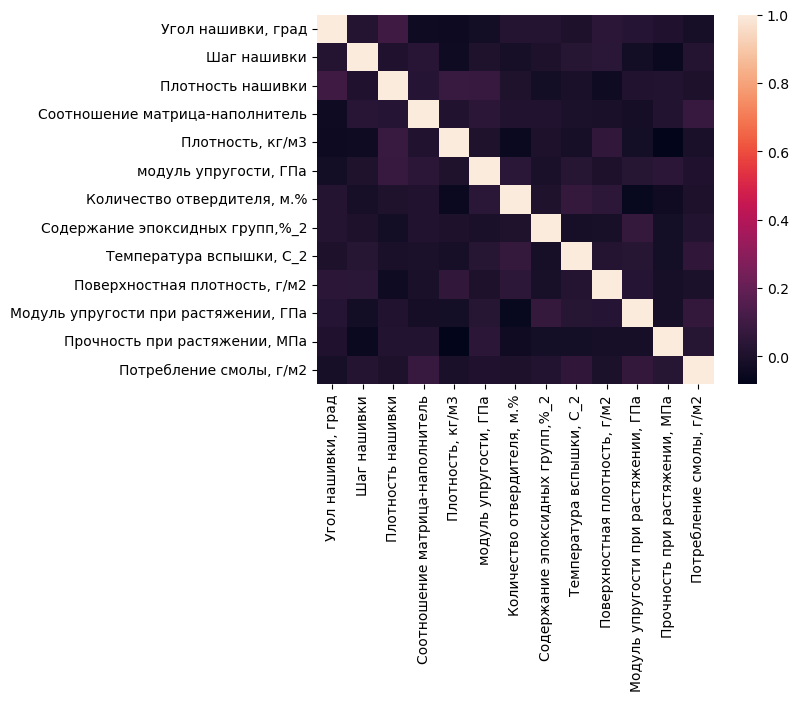

In [28]:
sns.heatmap(df.corr())

## 2. Применение алгоритмов машинного обучения

Попробуем предсказывать параметр "Модуль упругости при растяжении"

In [29]:
X = df.drop(['Модуль упругости при растяжении, ГПа'], axis = 1)
y = df['Модуль упругости при растяжении, ГПа']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 42)

### Линейная регрессия Лассо

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model_linreg = Lasso(alpha = 0.01) #альфа - константа, которая реализует L1 регуляризацию
model_linreg.fit(X_train, y_train)
mae_linreg = mean_absolute_error(y_test, model_linreg.predict(X_test))
print('MAE: {:.3f}'.format(mae_linreg))

MAE: 2.416


### Градиентный бустинг

In [31]:
import catboost

In [32]:
train_dataset = catboost.Pool(X_train, y_train) 
test_dataset = catboost.Pool(X_test, y_test)
model_catboost = catboost.CatBoostRegressor(loss_function = 'MAE')
# "решетчатый" подбор гиперпараметров:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model_catboost.grid_search(grid, train_dataset);
y_pred = model_catboost.predict(X_test)
mae_catboost = mean_absolute_error(y_test, y_pred)
print('MAE: {:.3f}'.format(mae_catboost))

0:	learn: 71.1042148	test: 71.1187821	best: 71.1187821 (0)	total: 227ms	remaining: 22.5s
1:	learn: 68.9735871	test: 68.9880457	best: 68.9880457 (1)	total: 230ms	remaining: 11.3s
2:	learn: 66.9089178	test: 66.9225525	best: 66.9225525 (2)	total: 233ms	remaining: 7.52s
3:	learn: 64.9030378	test: 64.9175578	best: 64.9175578 (3)	total: 236ms	remaining: 5.67s
4:	learn: 62.9581125	test: 62.9726993	best: 62.9726993 (4)	total: 239ms	remaining: 4.54s
5:	learn: 61.0708986	test: 61.0871333	best: 61.0871333 (5)	total: 242ms	remaining: 3.79s
6:	learn: 59.2392765	test: 59.2549402	best: 59.2549402 (6)	total: 245ms	remaining: 3.25s
7:	learn: 57.4648286	test: 57.4809114	best: 57.4809114 (7)	total: 247ms	remaining: 2.84s
8:	learn: 55.7439672	test: 55.7604770	best: 55.7604770 (8)	total: 249ms	remaining: 2.52s
9:	learn: 54.0745483	test: 54.0911924	best: 54.0911924 (9)	total: 251ms	remaining: 2.26s
10:	learn: 52.4557055	test: 52.4739266	best: 52.4739266 (10)	total: 253ms	remaining: 2.04s
11:	learn: 50.88634

0:	loss: 3.9856043	best: 3.9856043 (0)	total: 1.54s	remaining: 2m 25s
0:	learn: 65.9820962	test: 65.9979983	best: 65.9979983 (0)	total: 2.51ms	remaining: 249ms
1:	learn: 59.3908539	test: 59.4062761	best: 59.4062761 (1)	total: 5.46ms	remaining: 268ms
2:	learn: 53.4661661	test: 53.4790075	best: 53.4790075 (2)	total: 8.23ms	remaining: 266ms
3:	learn: 48.1262663	test: 48.1422034	best: 48.1422034 (3)	total: 11.2ms	remaining: 268ms
4:	learn: 43.3179265	test: 43.3340809	best: 43.3340809 (4)	total: 13.9ms	remaining: 264ms
5:	learn: 38.9928051	test: 39.0139021	best: 39.0139021 (5)	total: 16.6ms	remaining: 259ms
6:	learn: 35.0979109	test: 35.1173393	best: 35.1173393 (6)	total: 18.4ms	remaining: 244ms
7:	learn: 31.5964534	test: 31.6173233	best: 31.6173233 (7)	total: 20.2ms	remaining: 232ms
8:	learn: 28.4488751	test: 28.4707152	best: 28.4707152 (8)	total: 22ms	remaining: 222ms
9:	learn: 25.6137800	test: 25.6357664	best: 25.6357664 (9)	total: 23.6ms	remaining: 212ms
10:	learn: 23.0662346	test: 23.0

17:	learn: 42.4022580	test: 42.4212604	best: 42.4212604 (17)	total: 20.7ms	remaining: 94.4ms
18:	learn: 41.1333229	test: 41.1524912	best: 41.1524912 (18)	total: 22.2ms	remaining: 94.5ms
19:	learn: 39.9014084	test: 39.9203171	best: 39.9203171 (19)	total: 23.5ms	remaining: 93.8ms
20:	learn: 38.7068928	test: 38.7258896	best: 38.7258896 (20)	total: 24.8ms	remaining: 93.3ms
21:	learn: 37.5504612	test: 37.5717088	best: 37.5717088 (21)	total: 26.3ms	remaining: 93.3ms
22:	learn: 36.4263463	test: 36.4461617	best: 36.4461617 (22)	total: 27.7ms	remaining: 92.7ms
23:	learn: 35.3380889	test: 35.3573996	best: 35.3573996 (23)	total: 29ms	remaining: 91.9ms
24:	learn: 34.2796645	test: 34.2999604	best: 34.2999604 (24)	total: 30.3ms	remaining: 90.8ms
25:	learn: 33.2555537	test: 33.2747887	best: 33.2747887 (25)	total: 31.6ms	remaining: 89.9ms
26:	learn: 32.2625874	test: 32.2818479	best: 32.2818479 (26)	total: 32.9ms	remaining: 88.8ms
27:	learn: 31.2988759	test: 31.3169123	best: 31.3169123 (27)	total: 34.1

46:	learn: 2.4658324	test: 2.5476891	best: 2.5476891 (46)	total: 55.3ms	remaining: 62.3ms
47:	learn: 2.4568755	test: 2.5373143	best: 2.5373143 (47)	total: 56.6ms	remaining: 61.3ms
48:	learn: 2.4506929	test: 2.5306557	best: 2.5306557 (48)	total: 57.9ms	remaining: 60.3ms
49:	learn: 2.4417016	test: 2.5209986	best: 2.5209986 (49)	total: 59.1ms	remaining: 59.1ms
50:	learn: 2.4350097	test: 2.5128010	best: 2.5128010 (50)	total: 60.5ms	remaining: 58.1ms
51:	learn: 2.4294473	test: 2.5088198	best: 2.5088198 (51)	total: 61.9ms	remaining: 57.1ms
52:	learn: 2.4255683	test: 2.5039362	best: 2.5039362 (52)	total: 63.1ms	remaining: 56ms
53:	learn: 2.4186486	test: 2.5002212	best: 2.5002212 (53)	total: 64.3ms	remaining: 54.8ms
54:	learn: 2.4148609	test: 2.4988422	best: 2.4988422 (54)	total: 65.5ms	remaining: 53.6ms
55:	learn: 2.4086857	test: 2.4990531	best: 2.4988422 (54)	total: 66.9ms	remaining: 52.6ms
56:	learn: 2.4038709	test: 2.4988031	best: 2.4988031 (56)	total: 68.1ms	remaining: 51.4ms
57:	learn: 2

1:	learn: 59.3908539	test: 59.4062761	best: 59.4062761 (1)	total: 3.2ms	remaining: 157ms
2:	learn: 53.4661661	test: 53.4790075	best: 53.4790075 (2)	total: 4.69ms	remaining: 152ms
3:	learn: 48.1262663	test: 48.1422034	best: 48.1422034 (3)	total: 5.95ms	remaining: 143ms
4:	learn: 43.3179265	test: 43.3340809	best: 43.3340809 (4)	total: 7.04ms	remaining: 134ms
5:	learn: 38.9928051	test: 39.0139021	best: 39.0139021 (5)	total: 8.06ms	remaining: 126ms
6:	learn: 35.0979109	test: 35.1173393	best: 35.1173393 (6)	total: 9.08ms	remaining: 121ms
7:	learn: 31.5964534	test: 31.6173233	best: 31.6173233 (7)	total: 10.1ms	remaining: 116ms
8:	learn: 28.4488751	test: 28.4707152	best: 28.4707152 (8)	total: 11.1ms	remaining: 112ms
9:	learn: 25.6137800	test: 25.6357664	best: 25.6357664 (9)	total: 12.1ms	remaining: 109ms
10:	learn: 23.0662346	test: 23.0932508	best: 23.0932508 (10)	total: 13.2ms	remaining: 107ms
11:	learn: 20.7680366	test: 20.7965177	best: 20.7965177 (11)	total: 14.3ms	remaining: 105ms
12:	lea

40:	learn: 21.0941856	test: 21.1169013	best: 21.1169013 (40)	total: 43.8ms	remaining: 63.1ms
41:	learn: 20.4624294	test: 20.4854713	best: 20.4854713 (41)	total: 45.1ms	remaining: 62.3ms
42:	learn: 19.8542825	test: 19.8778805	best: 19.8778805 (42)	total: 46.4ms	remaining: 61.5ms
43:	learn: 19.2617119	test: 19.2836979	best: 19.2836979 (43)	total: 47.5ms	remaining: 60.4ms
44:	learn: 18.6840339	test: 18.7084367	best: 18.7084367 (44)	total: 48.5ms	remaining: 59.3ms
45:	learn: 18.1235754	test: 18.1462430	best: 18.1462430 (45)	total: 49.5ms	remaining: 58.1ms
46:	learn: 17.5815040	test: 17.6054940	best: 17.6054940 (46)	total: 50.5ms	remaining: 56.9ms
47:	learn: 17.0579937	test: 17.0814014	best: 17.0814014 (47)	total: 51.5ms	remaining: 55.8ms
48:	learn: 16.5494976	test: 16.5735900	best: 16.5735900 (48)	total: 52.5ms	remaining: 54.6ms
49:	learn: 16.0563072	test: 16.0800571	best: 16.0800571 (49)	total: 53.5ms	remaining: 53.5ms
50:	learn: 15.5779738	test: 15.6015688	best: 15.6015688 (50)	total: 54

79:	learn: 2.3172606	test: 2.5044197	best: 2.4987343 (73)	total: 86.7ms	remaining: 21.7ms
80:	learn: 2.3155164	test: 2.5035293	best: 2.4987343 (73)	total: 88.1ms	remaining: 20.7ms
81:	learn: 2.3115791	test: 2.5017718	best: 2.4987343 (73)	total: 89.3ms	remaining: 19.6ms
82:	learn: 2.3086614	test: 2.5018049	best: 2.4987343 (73)	total: 90.8ms	remaining: 18.6ms
83:	learn: 2.3071246	test: 2.5021927	best: 2.4987343 (73)	total: 92.2ms	remaining: 17.6ms
84:	learn: 2.3027863	test: 2.5075542	best: 2.4987343 (73)	total: 93.7ms	remaining: 16.5ms
85:	learn: 2.3020641	test: 2.5072865	best: 2.4987343 (73)	total: 95.2ms	remaining: 15.5ms
86:	learn: 2.2987668	test: 2.5070137	best: 2.4987343 (73)	total: 96.4ms	remaining: 14.4ms
87:	learn: 2.2962649	test: 2.5061750	best: 2.4987343 (73)	total: 97.6ms	remaining: 13.3ms
88:	learn: 2.2919759	test: 2.5033478	best: 2.4987343 (73)	total: 98.8ms	remaining: 12.2ms
89:	learn: 2.2911085	test: 2.5037520	best: 2.4987343 (73)	total: 100ms	remaining: 11.1ms
90:	learn: 

123:	learn: 2.8182198	test: 2.8742797	best: 2.8742797 (123)	total: 134ms	remaining: 28.1ms
124:	learn: 2.7963623	test: 2.8544185	best: 2.8544185 (124)	total: 135ms	remaining: 27ms
125:	learn: 2.7759607	test: 2.8347617	best: 2.8347617 (125)	total: 137ms	remaining: 26ms
126:	learn: 2.7568390	test: 2.8161515	best: 2.8161515 (126)	total: 139ms	remaining: 25.1ms
127:	learn: 2.7395963	test: 2.7991419	best: 2.7991419 (127)	total: 140ms	remaining: 24.1ms
128:	learn: 2.7222198	test: 2.7836865	best: 2.7836865 (128)	total: 142ms	remaining: 23.1ms
129:	learn: 2.7060676	test: 2.7687373	best: 2.7687373 (129)	total: 143ms	remaining: 22ms
130:	learn: 2.6903000	test: 2.7560480	best: 2.7560480 (130)	total: 144ms	remaining: 20.9ms
131:	learn: 2.6761127	test: 2.7439996	best: 2.7439996 (131)	total: 145ms	remaining: 19.8ms
132:	learn: 2.6620704	test: 2.7337358	best: 2.7337358 (132)	total: 146ms	remaining: 18.7ms
133:	learn: 2.6498607	test: 2.7224797	best: 2.7224797 (133)	total: 148ms	remaining: 17.6ms
134:	

98:	learn: 2.2668412	test: 2.5108956	best: 2.4889891 (75)	total: 130ms	remaining: 67.2ms
99:	learn: 2.2631144	test: 2.5135079	best: 2.4889891 (75)	total: 132ms	remaining: 66.1ms
100:	learn: 2.2598522	test: 2.5138578	best: 2.4889891 (75)	total: 134ms	remaining: 65ms
101:	learn: 2.2582265	test: 2.5139225	best: 2.4889891 (75)	total: 136ms	remaining: 64.1ms
102:	learn: 2.2538396	test: 2.5122620	best: 2.4889891 (75)	total: 138ms	remaining: 63.1ms
103:	learn: 2.2529100	test: 2.5128275	best: 2.4889891 (75)	total: 140ms	remaining: 61.9ms
104:	learn: 2.2497079	test: 2.5126554	best: 2.4889891 (75)	total: 142ms	remaining: 60.8ms
105:	learn: 2.2468535	test: 2.5127274	best: 2.4889891 (75)	total: 143ms	remaining: 59.5ms
106:	learn: 2.2447471	test: 2.5105635	best: 2.4889891 (75)	total: 145ms	remaining: 58.2ms
107:	learn: 2.2406374	test: 2.5081801	best: 2.4889891 (75)	total: 146ms	remaining: 56.9ms
108:	learn: 2.2376330	test: 2.5083029	best: 2.4889891 (75)	total: 148ms	remaining: 55.6ms
109:	learn: 2.

67:	learn: 9.3166741	test: 9.3397337	best: 9.3397337 (67)	total: 84ms	remaining: 101ms
68:	learn: 9.0391818	test: 9.0618584	best: 9.0618584 (68)	total: 85.2ms	remaining: 100ms
69:	learn: 8.7693412	test: 8.7919558	best: 8.7919558 (69)	total: 86.5ms	remaining: 98.9ms
70:	learn: 8.5090416	test: 8.5309759	best: 8.5309759 (70)	total: 88.4ms	remaining: 98.4ms
71:	learn: 8.2551039	test: 8.2772378	best: 8.2772378 (71)	total: 89.9ms	remaining: 97.4ms
72:	learn: 8.0110881	test: 8.0327533	best: 8.0327533 (72)	total: 91.2ms	remaining: 96.2ms
73:	learn: 7.7741500	test: 7.7951459	best: 7.7951459 (73)	total: 92.4ms	remaining: 94.9ms
74:	learn: 7.5467855	test: 7.5685397	best: 7.5685397 (74)	total: 93.6ms	remaining: 93.6ms
75:	learn: 7.3228504	test: 7.3490204	best: 7.3490204 (75)	total: 94.9ms	remaining: 92.4ms
76:	learn: 7.1088222	test: 7.1397825	best: 7.1397825 (76)	total: 96.4ms	remaining: 91.4ms
77:	learn: 6.8997111	test: 6.9349653	best: 6.9349653 (77)	total: 97.7ms	remaining: 90.2ms
78:	learn: 6.6

38:	learn: 2.6374547	test: 2.6997769	best: 2.6997769 (38)	total: 54.3ms	remaining: 155ms
39:	learn: 2.6004069	test: 2.6694437	best: 2.6694437 (39)	total: 56.3ms	remaining: 155ms
40:	learn: 2.5688719	test: 2.6440091	best: 2.6440091 (40)	total: 58.4ms	remaining: 155ms
41:	learn: 2.5443544	test: 2.6208142	best: 2.6208142 (41)	total: 60.3ms	remaining: 155ms
42:	learn: 2.5227414	test: 2.6000115	best: 2.6000115 (42)	total: 62.2ms	remaining: 155ms
43:	learn: 2.5035335	test: 2.5826629	best: 2.5826629 (43)	total: 64.2ms	remaining: 155ms
44:	learn: 2.4907937	test: 2.5739367	best: 2.5739367 (44)	total: 65.9ms	remaining: 154ms
45:	learn: 2.4765289	test: 2.5590866	best: 2.5590866 (45)	total: 67.6ms	remaining: 153ms
46:	learn: 2.4658324	test: 2.5476891	best: 2.5476891 (46)	total: 69.3ms	remaining: 152ms
47:	learn: 2.4568755	test: 2.5373143	best: 2.5373143 (47)	total: 70.9ms	remaining: 151ms
48:	learn: 2.4506929	test: 2.5306557	best: 2.5306557 (48)	total: 79.9ms	remaining: 165ms
49:	learn: 2.4417016	

89:	learn: 4.9100101	test: 5.0375593	best: 5.0375593 (89)	total: 123ms	remaining: 81.9ms
90:	learn: 4.7813552	test: 4.9129510	best: 4.9129510 (90)	total: 125ms	remaining: 80.9ms
91:	learn: 4.6570234	test: 4.7933718	best: 4.7933718 (91)	total: 126ms	remaining: 79.5ms
92:	learn: 4.5409248	test: 4.6796194	best: 4.6796194 (92)	total: 128ms	remaining: 78.2ms
93:	learn: 4.4290083	test: 4.5684444	best: 4.5684444 (93)	total: 129ms	remaining: 76.7ms
94:	learn: 4.3226749	test: 4.4602288	best: 4.4602288 (94)	total: 130ms	remaining: 75.2ms
95:	learn: 4.2231277	test: 4.3577952	best: 4.3577952 (95)	total: 132ms	remaining: 74ms
96:	learn: 4.1300237	test: 4.2539036	best: 4.2539036 (96)	total: 133ms	remaining: 72.6ms
97:	learn: 4.0416834	test: 4.1608157	best: 4.1608157 (97)	total: 134ms	remaining: 71.1ms
98:	learn: 3.9569329	test: 4.0707107	best: 4.0707107 (98)	total: 135ms	remaining: 69.5ms
99:	learn: 3.8783851	test: 3.9859120	best: 3.9859120 (99)	total: 136ms	remaining: 68ms
100:	learn: 3.8016375	tes

51:	learn: 2.4294473	test: 2.5088198	best: 2.5088198 (51)	total: 66.5ms	remaining: 125ms
52:	learn: 2.4255683	test: 2.5039362	best: 2.5039362 (52)	total: 68.7ms	remaining: 126ms
53:	learn: 2.4186486	test: 2.5002212	best: 2.5002212 (53)	total: 71.7ms	remaining: 127ms
54:	learn: 2.4148609	test: 2.4988422	best: 2.4988422 (54)	total: 73.5ms	remaining: 127ms
55:	learn: 2.4086857	test: 2.4990531	best: 2.4988422 (54)	total: 74.9ms	remaining: 126ms
56:	learn: 2.4038709	test: 2.4988031	best: 2.4988031 (56)	total: 76.1ms	remaining: 124ms
57:	learn: 2.3997876	test: 2.4989092	best: 2.4988031 (56)	total: 77.1ms	remaining: 122ms
58:	learn: 2.3973656	test: 2.5003099	best: 2.4988031 (56)	total: 79.2ms	remaining: 122ms
59:	learn: 2.3946338	test: 2.5033416	best: 2.4988031 (56)	total: 80.4ms	remaining: 121ms
60:	learn: 2.3888343	test: 2.5076058	best: 2.4988031 (56)	total: 81.5ms	remaining: 119ms
61:	learn: 2.3847336	test: 2.5078736	best: 2.4988031 (56)	total: 82.5ms	remaining: 117ms
62:	learn: 2.3824188	

101:	learn: 3.7306202	test: 3.8307334	best: 3.8307334 (101)	total: 136ms	remaining: 64ms
102:	learn: 3.6624759	test: 3.7595924	best: 3.7595924 (102)	total: 138ms	remaining: 63.1ms
103:	learn: 3.5969487	test: 3.6916050	best: 3.6916050 (103)	total: 140ms	remaining: 62ms
104:	learn: 3.5363362	test: 3.6292717	best: 3.6292717 (104)	total: 142ms	remaining: 60.6ms
105:	learn: 3.4779782	test: 3.5675943	best: 3.5675943 (105)	total: 143ms	remaining: 59.2ms
106:	learn: 3.4231895	test: 3.5103002	best: 3.5103002 (106)	total: 145ms	remaining: 58.1ms
107:	learn: 3.3696036	test: 3.4567812	best: 3.4567812 (107)	total: 147ms	remaining: 57ms
108:	learn: 3.3204987	test: 3.4069734	best: 3.4069734 (108)	total: 148ms	remaining: 55.7ms
109:	learn: 3.2732752	test: 3.3572103	best: 3.3572103 (109)	total: 149ms	remaining: 54.3ms
110:	learn: 3.2276877	test: 3.3090752	best: 3.3090752 (110)	total: 152ms	remaining: 53.2ms
111:	learn: 3.1861315	test: 3.2633763	best: 3.2633763 (111)	total: 153ms	remaining: 51.9ms
112:	

53:	learn: 2.4198036	test: 2.5057936	best: 2.5057936 (53)	total: 74ms	remaining: 132ms
54:	learn: 2.4158403	test: 2.5040385	best: 2.5040385 (54)	total: 75.6ms	remaining: 131ms
55:	learn: 2.4095368	test: 2.5041756	best: 2.5040385 (54)	total: 77.1ms	remaining: 129ms
56:	learn: 2.4047693	test: 2.5040383	best: 2.5040383 (56)	total: 78.5ms	remaining: 128ms
57:	learn: 2.3993253	test: 2.5037417	best: 2.5037417 (57)	total: 80ms	remaining: 127ms
58:	learn: 2.3954036	test: 2.5016005	best: 2.5016005 (58)	total: 82.3ms	remaining: 127ms
59:	learn: 2.3927627	test: 2.5055287	best: 2.5016005 (58)	total: 85.6ms	remaining: 128ms
60:	learn: 2.3862182	test: 2.5089836	best: 2.5016005 (58)	total: 86.7ms	remaining: 127ms
61:	learn: 2.3836569	test: 2.5114322	best: 2.5016005 (58)	total: 88.5ms	remaining: 126ms
62:	learn: 2.3800630	test: 2.5126946	best: 2.5016005 (58)	total: 89.8ms	remaining: 124ms
63:	learn: 2.3766417	test: 2.5101563	best: 2.5016005 (58)	total: 91ms	remaining: 122ms
64:	learn: 2.3730246	test: 

51:	learn: 15.1104352	test: 15.1334925	best: 15.1334925 (51)	total: 58.9ms	remaining: 168ms
52:	learn: 14.6606549	test: 14.6854541	best: 14.6854541 (52)	total: 60.6ms	remaining: 168ms
53:	learn: 14.2219451	test: 14.2485071	best: 14.2485071 (53)	total: 62.2ms	remaining: 168ms
54:	learn: 13.7978250	test: 13.8241903	best: 13.8241903 (54)	total: 63.7ms	remaining: 168ms
55:	learn: 13.3869135	test: 13.4142173	best: 13.4142173 (55)	total: 65.1ms	remaining: 167ms
56:	learn: 12.9885847	test: 13.0155509	best: 13.0155509 (56)	total: 66.8ms	remaining: 168ms
57:	learn: 12.6012617	test: 12.6285402	best: 12.6285402 (57)	total: 68.1ms	remaining: 167ms
58:	learn: 12.2264198	test: 12.2530655	best: 12.2530655 (58)	total: 69.7ms	remaining: 167ms
59:	learn: 11.8614720	test: 11.8888012	best: 11.8888012 (59)	total: 71ms	remaining: 166ms
60:	learn: 11.5092600	test: 11.5355262	best: 11.5355262 (60)	total: 73ms	remaining: 166ms
61:	learn: 11.1670447	test: 11.1928107	best: 11.1928107 (61)	total: 74.3ms	remaining

168:	learn: 2.4524691	test: 2.5566132	best: 2.5566132 (168)	total: 219ms	remaining: 40.2ms
169:	learn: 2.4504717	test: 2.5541332	best: 2.5541332 (169)	total: 221ms	remaining: 39ms
170:	learn: 2.4482771	test: 2.5523752	best: 2.5523752 (170)	total: 223ms	remaining: 37.8ms
171:	learn: 2.4462941	test: 2.5515252	best: 2.5515252 (171)	total: 226ms	remaining: 36.8ms
172:	learn: 2.4440121	test: 2.5496912	best: 2.5496912 (172)	total: 228ms	remaining: 35.6ms
173:	learn: 2.4418280	test: 2.5484303	best: 2.5484303 (173)	total: 229ms	remaining: 34.3ms
174:	learn: 2.4403241	test: 2.5471380	best: 2.5471380 (174)	total: 231ms	remaining: 33ms
175:	learn: 2.4387993	test: 2.5458473	best: 2.5458473 (175)	total: 233ms	remaining: 31.7ms
176:	learn: 2.4367200	test: 2.5446180	best: 2.5446180 (176)	total: 234ms	remaining: 30.4ms
177:	learn: 2.4340586	test: 2.5450553	best: 2.5446180 (176)	total: 235ms	remaining: 29ms
178:	learn: 2.4324962	test: 2.5436438	best: 2.5436438 (178)	total: 236ms	remaining: 27.7ms
179:	

100:	learn: 2.2598522	test: 2.5138578	best: 2.4889891 (75)	total: 113ms	remaining: 111ms
101:	learn: 2.2582265	test: 2.5139225	best: 2.4889891 (75)	total: 115ms	remaining: 110ms
102:	learn: 2.2538396	test: 2.5122620	best: 2.4889891 (75)	total: 116ms	remaining: 109ms
103:	learn: 2.2529100	test: 2.5128275	best: 2.4889891 (75)	total: 118ms	remaining: 109ms
104:	learn: 2.2497079	test: 2.5126554	best: 2.4889891 (75)	total: 119ms	remaining: 108ms
105:	learn: 2.2468535	test: 2.5127274	best: 2.4889891 (75)	total: 121ms	remaining: 107ms
106:	learn: 2.2447471	test: 2.5105635	best: 2.4889891 (75)	total: 122ms	remaining: 106ms
107:	learn: 2.2406374	test: 2.5081801	best: 2.4889891 (75)	total: 123ms	remaining: 105ms
108:	learn: 2.2376330	test: 2.5083029	best: 2.4889891 (75)	total: 125ms	remaining: 104ms
109:	learn: 2.2362510	test: 2.5107425	best: 2.4889891 (75)	total: 126ms	remaining: 103ms
110:	learn: 2.2343053	test: 2.5108352	best: 2.4889891 (75)	total: 128ms	remaining: 102ms
111:	learn: 2.2316578

28:	learn: 30.3613502	test: 30.3798187	best: 30.3798187 (28)	total: 37.7ms	remaining: 222ms
29:	learn: 29.4519108	test: 29.4723157	best: 29.4723157 (29)	total: 39.2ms	remaining: 222ms
30:	learn: 28.5715833	test: 28.5911973	best: 28.5911973 (30)	total: 40.5ms	remaining: 221ms
31:	learn: 27.7179939	test: 27.7378424	best: 27.7378424 (31)	total: 42.6ms	remaining: 223ms
32:	learn: 26.8910353	test: 26.9119309	best: 26.9119309 (32)	total: 44.6ms	remaining: 226ms
33:	learn: 26.0859696	test: 26.1090652	best: 26.1090652 (33)	total: 45.8ms	remaining: 224ms
34:	learn: 25.3057175	test: 25.3292046	best: 25.3292046 (34)	total: 46.8ms	remaining: 221ms
35:	learn: 24.5501181	test: 24.5740095	best: 24.5740095 (35)	total: 47.9ms	remaining: 218ms
36:	learn: 23.8169969	test: 23.8406314	best: 23.8406314 (36)	total: 49.6ms	remaining: 218ms
37:	learn: 23.1028492	test: 23.1281836	best: 23.1281836 (37)	total: 50.9ms	remaining: 217ms
38:	learn: 22.4121945	test: 22.4366547	best: 22.4366547 (38)	total: 52ms	remaini

167:	learn: 2.4554411	test: 2.5585268	best: 2.5585268 (167)	total: 199ms	remaining: 37.8ms
168:	learn: 2.4524691	test: 2.5566132	best: 2.5566132 (168)	total: 200ms	remaining: 36.7ms
169:	learn: 2.4504717	test: 2.5541332	best: 2.5541332 (169)	total: 201ms	remaining: 35.5ms
170:	learn: 2.4482771	test: 2.5523752	best: 2.5523752 (170)	total: 202ms	remaining: 34.3ms
171:	learn: 2.4462941	test: 2.5515252	best: 2.5515252 (171)	total: 204ms	remaining: 33.2ms
172:	learn: 2.4440121	test: 2.5496912	best: 2.5496912 (172)	total: 205ms	remaining: 32ms
173:	learn: 2.4418280	test: 2.5484303	best: 2.5484303 (173)	total: 206ms	remaining: 30.8ms
174:	learn: 2.4403241	test: 2.5471380	best: 2.5471380 (174)	total: 208ms	remaining: 29.6ms
175:	learn: 2.4387993	test: 2.5458473	best: 2.5458473 (175)	total: 209ms	remaining: 28.4ms
176:	learn: 2.4367200	test: 2.5446180	best: 2.5446180 (176)	total: 210ms	remaining: 27.2ms
177:	learn: 2.4340586	test: 2.5450553	best: 2.5446180 (176)	total: 211ms	remaining: 26.1ms
1

123:	learn: 2.2088437	test: 2.5224201	best: 2.4936397 (76)	total: 133ms	remaining: 81.2ms
124:	learn: 2.2069208	test: 2.5220781	best: 2.4936397 (76)	total: 134ms	remaining: 80.4ms
125:	learn: 2.2023729	test: 2.5231219	best: 2.4936397 (76)	total: 135ms	remaining: 79.5ms
126:	learn: 2.2007725	test: 2.5227500	best: 2.4936397 (76)	total: 137ms	remaining: 78.6ms
127:	learn: 2.1999483	test: 2.5236809	best: 2.4936397 (76)	total: 138ms	remaining: 77.7ms
128:	learn: 2.1980716	test: 2.5231832	best: 2.4936397 (76)	total: 139ms	remaining: 76.7ms
129:	learn: 2.1944797	test: 2.5212469	best: 2.4936397 (76)	total: 140ms	remaining: 75.6ms
130:	learn: 2.1923931	test: 2.5226455	best: 2.4936397 (76)	total: 142ms	remaining: 74.6ms
131:	learn: 2.1886464	test: 2.5237105	best: 2.4936397 (76)	total: 143ms	remaining: 73.4ms
132:	learn: 2.1862174	test: 2.5239259	best: 2.4936397 (76)	total: 144ms	remaining: 72.3ms
133:	learn: 2.1852826	test: 2.5233075	best: 2.4936397 (76)	total: 145ms	remaining: 71.3ms
134:	learn

71:	learn: 8.2552034	test: 8.2768954	best: 8.2768954 (71)	total: 77.8ms	remaining: 138ms
72:	learn: 8.0112081	test: 8.0324154	best: 8.0324154 (72)	total: 79.3ms	remaining: 138ms
73:	learn: 7.7743613	test: 7.7948985	best: 7.7948985 (73)	total: 80.6ms	remaining: 137ms
74:	learn: 7.5470959	test: 7.5684302	best: 7.5684302 (74)	total: 82.1ms	remaining: 137ms
75:	learn: 7.3230880	test: 7.3488542	best: 7.3488542 (75)	total: 83.4ms	remaining: 136ms
76:	learn: 7.1091085	test: 7.1396638	best: 7.1396638 (76)	total: 84.6ms	remaining: 135ms
77:	learn: 6.9000038	test: 6.9348426	best: 6.9348426 (77)	total: 85.7ms	remaining: 134ms
78:	learn: 6.6988524	test: 6.7406390	best: 6.7406390 (78)	total: 86.8ms	remaining: 133ms
79:	learn: 6.5026241	test: 6.5535895	best: 6.5535895 (79)	total: 87.8ms	remaining: 132ms
80:	learn: 6.3128898	test: 6.3750595	best: 6.3750595 (80)	total: 88.9ms	remaining: 131ms
81:	learn: 6.1318949	test: 6.2012033	best: 6.2012033 (81)	total: 90.2ms	remaining: 130ms
82:	learn: 5.9555575	

20:	learn: 8.0950020	test: 8.1233504	best: 8.1233504 (20)	total: 23.6ms	remaining: 201ms
21:	learn: 7.3050063	test: 7.3423627	best: 7.3423627 (21)	total: 25.1ms	remaining: 203ms
22:	learn: 6.5867156	test: 6.6382576	best: 6.6382576 (22)	total: 26.3ms	remaining: 203ms
23:	learn: 5.9545499	test: 6.0401173	best: 6.0401173 (23)	total: 27.6ms	remaining: 202ms
24:	learn: 5.3978650	test: 5.5143217	best: 5.5143217 (24)	total: 28.9ms	remaining: 202ms
25:	learn: 4.9184428	test: 5.0510837	best: 5.0510837 (25)	total: 30.2ms	remaining: 202ms
26:	learn: 4.5003577	test: 4.6434979	best: 4.6434979 (26)	total: 31.3ms	remaining: 201ms
27:	learn: 4.1491403	test: 4.2719672	best: 4.2719672 (27)	total: 32.4ms	remaining: 199ms
28:	learn: 3.8601849	test: 3.9620615	best: 3.9620615 (28)	total: 33.5ms	remaining: 197ms
29:	learn: 3.6133604	test: 3.7104855	best: 3.7104855 (29)	total: 34.7ms	remaining: 197ms
30:	learn: 3.4142696	test: 3.5006403	best: 3.5006403 (30)	total: 35.8ms	remaining: 195ms
31:	learn: 3.2493179	

170:	learn: 2.1186085	test: 2.5139868	best: 2.4936397 (76)	total: 187ms	remaining: 31.7ms
171:	learn: 2.1166554	test: 2.5116248	best: 2.4936397 (76)	total: 189ms	remaining: 30.7ms
172:	learn: 2.1149153	test: 2.5089363	best: 2.4936397 (76)	total: 190ms	remaining: 29.6ms
173:	learn: 2.1115378	test: 2.5081323	best: 2.4936397 (76)	total: 191ms	remaining: 28.6ms
174:	learn: 2.1097755	test: 2.5077124	best: 2.4936397 (76)	total: 193ms	remaining: 27.5ms
175:	learn: 2.1051918	test: 2.5060638	best: 2.4936397 (76)	total: 194ms	remaining: 26.4ms
176:	learn: 2.1035197	test: 2.5063545	best: 2.4936397 (76)	total: 195ms	remaining: 25.3ms
177:	learn: 2.1014321	test: 2.5057697	best: 2.4936397 (76)	total: 196ms	remaining: 24.2ms
178:	learn: 2.1002581	test: 2.5052768	best: 2.4936397 (76)	total: 197ms	remaining: 23.1ms
179:	learn: 2.0967147	test: 2.5069793	best: 2.4936397 (76)	total: 198ms	remaining: 22ms
180:	learn: 2.0941905	test: 2.5070752	best: 2.4936397 (76)	total: 200ms	remaining: 20.9ms
181:	learn: 

118:	learn: 2.9459436	test: 2.9994287	best: 2.9994287 (118)	total: 127ms	remaining: 86.2ms
119:	learn: 2.9178468	test: 2.9698648	best: 2.9698648 (119)	total: 128ms	remaining: 85.4ms
120:	learn: 2.8915026	test: 2.9435461	best: 2.9435461 (120)	total: 129ms	remaining: 84.5ms
121:	learn: 2.8666263	test: 2.9191738	best: 2.9191738 (121)	total: 131ms	remaining: 83.7ms
122:	learn: 2.8423656	test: 2.8951702	best: 2.8951702 (122)	total: 132ms	remaining: 82.8ms
123:	learn: 2.8193561	test: 2.8743970	best: 2.8743970 (123)	total: 133ms	remaining: 81.8ms
124:	learn: 2.7973188	test: 2.8547462	best: 2.8547462 (124)	total: 134ms	remaining: 80.7ms
125:	learn: 2.7766424	test: 2.8349674	best: 2.8349674 (125)	total: 136ms	remaining: 79.6ms
126:	learn: 2.7574891	test: 2.8162970	best: 2.8162970 (126)	total: 137ms	remaining: 78.6ms
127:	learn: 2.7400138	test: 2.7996417	best: 2.7996417 (127)	total: 138ms	remaining: 77.6ms
128:	learn: 2.7226160	test: 2.7840698	best: 2.7840698 (128)	total: 140ms	remaining: 76.8ms

79:	learn: 2.3172606	test: 2.5044197	best: 2.4987343 (73)	total: 85.1ms	remaining: 128ms
80:	learn: 2.3155164	test: 2.5035293	best: 2.4987343 (73)	total: 86.5ms	remaining: 127ms
81:	learn: 2.3115791	test: 2.5017718	best: 2.4987343 (73)	total: 87.8ms	remaining: 126ms
82:	learn: 2.3086614	test: 2.5018049	best: 2.4987343 (73)	total: 89.2ms	remaining: 126ms
83:	learn: 2.3071246	test: 2.5021927	best: 2.4987343 (73)	total: 90.6ms	remaining: 125ms
84:	learn: 2.3027863	test: 2.5075542	best: 2.4987343 (73)	total: 91.8ms	remaining: 124ms
85:	learn: 2.3020641	test: 2.5072865	best: 2.4987343 (73)	total: 93ms	remaining: 123ms
86:	learn: 2.2987668	test: 2.5070137	best: 2.4987343 (73)	total: 94ms	remaining: 122ms
87:	learn: 2.2962649	test: 2.5061750	best: 2.4987343 (73)	total: 95.2ms	remaining: 121ms
88:	learn: 2.2919759	test: 2.5033478	best: 2.4987343 (73)	total: 96.4ms	remaining: 120ms
89:	learn: 2.2911085	test: 2.5037520	best: 2.4987343 (73)	total: 97.4ms	remaining: 119ms
90:	learn: 2.2872879	test

15:	learn: 45.0748360	test: 45.0970104	best: 45.0970104 (15)	total: 35ms	remaining: 183ms
16:	learn: 43.7282394	test: 43.7503083	best: 43.7503083 (16)	total: 38ms	remaining: 185ms
17:	learn: 42.4226297	test: 42.4444104	best: 42.4444104 (17)	total: 39.4ms	remaining: 180ms
18:	learn: 41.1527647	test: 41.1851092	best: 41.1851092 (18)	total: 41.6ms	remaining: 177ms
19:	learn: 39.9237403	test: 39.9575110	best: 39.9575110 (19)	total: 43.7ms	remaining: 175ms
20:	learn: 38.7312925	test: 38.7664667	best: 38.7664667 (20)	total: 45.9ms	remaining: 173ms
21:	learn: 37.5741155	test: 37.6086630	best: 37.6086630 (21)	total: 47.9ms	remaining: 170ms
22:	learn: 36.4511768	test: 36.4941831	best: 36.4941831 (22)	total: 49.8ms	remaining: 167ms
23:	learn: 35.3630205	test: 35.4041828	best: 35.4041828 (23)	total: 51.8ms	remaining: 164ms
24:	learn: 34.3073525	test: 34.3480521	best: 34.3480521 (24)	total: 53.7ms	remaining: 161ms
25:	learn: 33.2815231	test: 33.3205009	best: 33.3205009 (25)	total: 55.7ms	remaining

81:	learn: 2.0055138	test: 2.5521731	best: 2.5431455 (70)	total: 170ms	remaining: 37.3ms
82:	learn: 1.9966826	test: 2.5456309	best: 2.5431455 (70)	total: 174ms	remaining: 35.5ms
83:	learn: 1.9893517	test: 2.5515914	best: 2.5431455 (70)	total: 176ms	remaining: 33.5ms
84:	learn: 1.9840294	test: 2.5522484	best: 2.5431455 (70)	total: 178ms	remaining: 31.5ms
85:	learn: 1.9804094	test: 2.5506508	best: 2.5431455 (70)	total: 180ms	remaining: 29.4ms
86:	learn: 1.9761542	test: 2.5491804	best: 2.5431455 (70)	total: 182ms	remaining: 27.3ms
87:	learn: 1.9719840	test: 2.5509436	best: 2.5431455 (70)	total: 185ms	remaining: 25.3ms
88:	learn: 1.9670307	test: 2.5500432	best: 2.5431455 (70)	total: 188ms	remaining: 23.2ms
89:	learn: 1.9589771	test: 2.5517133	best: 2.5431455 (70)	total: 190ms	remaining: 21.1ms
90:	learn: 1.9515799	test: 2.5513629	best: 2.5431455 (70)	total: 192ms	remaining: 19ms
91:	learn: 1.9428208	test: 2.5513215	best: 2.5431455 (70)	total: 194ms	remaining: 16.8ms
92:	learn: 1.9350681	te

0:	learn: 65.9876800	test: 66.0091764	best: 66.0091764 (0)	total: 15.2ms	remaining: 1.5s
1:	learn: 59.4000136	test: 59.4225941	best: 59.4225941 (1)	total: 21.8ms	remaining: 1.07s
2:	learn: 53.4746090	test: 53.4918004	best: 53.4918004 (2)	total: 26ms	remaining: 841ms
3:	learn: 48.1370927	test: 48.1512727	best: 48.1512727 (3)	total: 29.2ms	remaining: 700ms
4:	learn: 43.3413317	test: 43.3486950	best: 43.3486950 (4)	total: 35.3ms	remaining: 671ms
5:	learn: 39.0224226	test: 39.0413255	best: 39.0413255 (5)	total: 41.6ms	remaining: 653ms
6:	learn: 35.1385851	test: 35.1617143	best: 35.1617143 (6)	total: 48.9ms	remaining: 649ms
7:	learn: 31.6359675	test: 31.6712048	best: 31.6712048 (7)	total: 56.4ms	remaining: 648ms
8:	learn: 28.4897759	test: 28.5219380	best: 28.5219380 (8)	total: 61.1ms	remaining: 617ms
9:	learn: 25.6520317	test: 25.6888078	best: 25.6888078 (9)	total: 76.6ms	remaining: 690ms
10:	learn: 23.1043801	test: 23.1382083	best: 23.1382083 (10)	total: 80.2ms	remaining: 649ms
11:	learn: 

11:	learn: 50.9019950	test: 50.9230758	best: 50.9230758 (11)	total: 33ms	remaining: 242ms
12:	learn: 49.3794095	test: 49.4005345	best: 49.4005345 (12)	total: 37.6ms	remaining: 251ms
13:	learn: 47.9008582	test: 47.9214037	best: 47.9214037 (13)	total: 41.8ms	remaining: 257ms
14:	learn: 46.4684008	test: 46.4905448	best: 46.4905448 (14)	total: 47.3ms	remaining: 268ms
15:	learn: 45.0748360	test: 45.0970104	best: 45.0970104 (15)	total: 51.9ms	remaining: 272ms
16:	learn: 43.7282394	test: 43.7503083	best: 43.7503083 (16)	total: 54.9ms	remaining: 268ms
17:	learn: 42.4226297	test: 42.4444104	best: 42.4444104 (17)	total: 56.2ms	remaining: 256ms
18:	learn: 41.1527647	test: 41.1851092	best: 41.1851092 (18)	total: 58.6ms	remaining: 250ms
19:	learn: 39.9237403	test: 39.9575110	best: 39.9575110 (19)	total: 61.4ms	remaining: 246ms
20:	learn: 38.7312925	test: 38.7664667	best: 38.7664667 (20)	total: 64.2ms	remaining: 242ms
21:	learn: 37.5741155	test: 37.6086630	best: 37.6086630 (21)	total: 66.9ms	remaini

58:	learn: 2.1586330	test: 2.5624515	best: 2.5624515 (58)	total: 140ms	remaining: 97.6ms
59:	learn: 2.1517662	test: 2.5612240	best: 2.5612240 (59)	total: 144ms	remaining: 95.7ms
60:	learn: 2.1443078	test: 2.5542569	best: 2.5542569 (60)	total: 146ms	remaining: 93.6ms
61:	learn: 2.1358928	test: 2.5600247	best: 2.5542569 (60)	total: 149ms	remaining: 91.2ms
62:	learn: 2.1263934	test: 2.5588365	best: 2.5542569 (60)	total: 152ms	remaining: 89ms
63:	learn: 2.1181860	test: 2.5522081	best: 2.5522081 (63)	total: 154ms	remaining: 86.7ms
64:	learn: 2.1085493	test: 2.5450666	best: 2.5450666 (64)	total: 157ms	remaining: 84.4ms
65:	learn: 2.1014281	test: 2.5471466	best: 2.5450666 (64)	total: 159ms	remaining: 82.1ms
66:	learn: 2.0912579	test: 2.5553232	best: 2.5450666 (64)	total: 162ms	remaining: 79.7ms
67:	learn: 2.0822697	test: 2.5584209	best: 2.5450666 (64)	total: 164ms	remaining: 77.4ms
68:	learn: 2.0741096	test: 2.5605079	best: 2.5450666 (64)	total: 167ms	remaining: 75ms
69:	learn: 2.0703231	test

1:	learn: 59.4000136	test: 59.4225941	best: 59.4225941 (1)	total: 5.31ms	remaining: 260ms
2:	learn: 53.4746090	test: 53.4918004	best: 53.4918004 (2)	total: 7.47ms	remaining: 242ms
3:	learn: 48.1370927	test: 48.1512727	best: 48.1512727 (3)	total: 8.91ms	remaining: 214ms
4:	learn: 43.3413317	test: 43.3486950	best: 43.3486950 (4)	total: 10.8ms	remaining: 206ms
5:	learn: 39.0224226	test: 39.0413255	best: 39.0413255 (5)	total: 12.8ms	remaining: 200ms
6:	learn: 35.1385851	test: 35.1617143	best: 35.1617143 (6)	total: 15.6ms	remaining: 207ms
7:	learn: 31.6359675	test: 31.6712048	best: 31.6712048 (7)	total: 17.7ms	remaining: 203ms
8:	learn: 28.4897759	test: 28.5219380	best: 28.5219380 (8)	total: 19.6ms	remaining: 199ms
9:	learn: 25.6520317	test: 25.6888078	best: 25.6888078 (9)	total: 21.6ms	remaining: 195ms
10:	learn: 23.1043801	test: 23.1382083	best: 23.1382083 (10)	total: 23.6ms	remaining: 191ms
11:	learn: 20.8190564	test: 20.8595407	best: 20.8595407 (11)	total: 25.5ms	remaining: 187ms
12:	le

59:	learn: 11.8875313	test: 11.9300125	best: 11.9300125 (59)	total: 134ms	remaining: 201ms
60:	learn: 11.5325984	test: 11.5762559	best: 11.5762559 (60)	total: 137ms	remaining: 200ms
61:	learn: 11.1916644	test: 11.2355295	best: 11.2355295 (61)	total: 139ms	remaining: 197ms
62:	learn: 10.8605605	test: 10.9061903	best: 10.9061903 (62)	total: 141ms	remaining: 195ms
63:	learn: 10.5379369	test: 10.5849915	best: 10.5849915 (63)	total: 143ms	remaining: 192ms
64:	learn: 10.2242714	test: 10.2702135	best: 10.2702135 (64)	total: 146ms	remaining: 190ms
65:	learn: 9.9225482	test: 9.9691005	best: 9.9691005 (65)	total: 148ms	remaining: 188ms
66:	learn: 9.6275385	test: 9.6732247	best: 9.6732247 (66)	total: 150ms	remaining: 186ms
67:	learn: 9.3410860	test: 9.3877241	best: 9.3877241 (67)	total: 152ms	remaining: 183ms
68:	learn: 9.0665293	test: 9.1132124	best: 9.1132124 (68)	total: 154ms	remaining: 181ms
69:	learn: 8.8005874	test: 8.8442953	best: 8.8442953 (69)	total: 156ms	remaining: 179ms
70:	learn: 8.5

59:	learn: 2.1528681	test: 2.5579283	best: 2.5579283 (59)	total: 121ms	remaining: 181ms
60:	learn: 2.1431245	test: 2.5607551	best: 2.5579283 (59)	total: 124ms	remaining: 180ms
61:	learn: 2.1312537	test: 2.5593778	best: 2.5579283 (59)	total: 126ms	remaining: 179ms
62:	learn: 2.1219212	test: 2.5527678	best: 2.5527678 (62)	total: 129ms	remaining: 178ms
63:	learn: 2.1135709	test: 2.5479193	best: 2.5479193 (63)	total: 131ms	remaining: 176ms
64:	learn: 2.1032337	test: 2.5493127	best: 2.5479193 (63)	total: 134ms	remaining: 176ms
65:	learn: 2.1005933	test: 2.5490760	best: 2.5479193 (63)	total: 137ms	remaining: 174ms
66:	learn: 2.0935507	test: 2.5557606	best: 2.5479193 (63)	total: 139ms	remaining: 173ms
67:	learn: 2.0884771	test: 2.5542290	best: 2.5479193 (63)	total: 142ms	remaining: 171ms
68:	learn: 2.0830476	test: 2.5544562	best: 2.5479193 (63)	total: 144ms	remaining: 169ms
69:	learn: 2.0785602	test: 2.5507019	best: 2.5479193 (63)	total: 147ms	remaining: 168ms
70:	learn: 2.0723858	test: 2.543

65:	learn: 9.9225482	test: 9.9691005	best: 9.9691005 (65)	total: 152ms	remaining: 194ms
66:	learn: 9.6275385	test: 9.6732247	best: 9.6732247 (66)	total: 155ms	remaining: 192ms
67:	learn: 9.3410860	test: 9.3877241	best: 9.3877241 (67)	total: 158ms	remaining: 191ms
68:	learn: 9.0665293	test: 9.1132124	best: 9.1132124 (68)	total: 161ms	remaining: 189ms
69:	learn: 8.8005874	test: 8.8442953	best: 8.8442953 (69)	total: 164ms	remaining: 187ms
70:	learn: 8.5398244	test: 8.5833526	best: 8.5833526 (70)	total: 168ms	remaining: 187ms
71:	learn: 8.2867756	test: 8.3297704	best: 8.3297704 (71)	total: 171ms	remaining: 185ms
72:	learn: 8.0431772	test: 8.0828823	best: 8.0828823 (72)	total: 174ms	remaining: 183ms
73:	learn: 7.8065479	test: 7.8482752	best: 7.8482752 (73)	total: 176ms	remaining: 181ms
74:	learn: 7.5765584	test: 7.6165563	best: 7.6165563 (74)	total: 180ms	remaining: 180ms
75:	learn: 7.3524477	test: 7.3960338	best: 7.3960338 (75)	total: 183ms	remaining: 178ms
76:	learn: 7.1391159	test: 7.187

67:	learn: 2.0884771	test: 2.5542290	best: 2.5479193 (63)	total: 139ms	remaining: 168ms
68:	learn: 2.0830476	test: 2.5544562	best: 2.5479193 (63)	total: 142ms	remaining: 167ms
69:	learn: 2.0785602	test: 2.5507019	best: 2.5479193 (63)	total: 145ms	remaining: 166ms
70:	learn: 2.0723858	test: 2.5431455	best: 2.5431455 (70)	total: 147ms	remaining: 164ms
71:	learn: 2.0629664	test: 2.5480756	best: 2.5431455 (70)	total: 150ms	remaining: 162ms
72:	learn: 2.0555057	test: 2.5515767	best: 2.5431455 (70)	total: 152ms	remaining: 161ms
73:	learn: 2.0495345	test: 2.5502601	best: 2.5431455 (70)	total: 155ms	remaining: 159ms
74:	learn: 2.0462190	test: 2.5559220	best: 2.5431455 (70)	total: 157ms	remaining: 157ms
75:	learn: 2.0400095	test: 2.5536340	best: 2.5431455 (70)	total: 160ms	remaining: 155ms
76:	learn: 2.0342238	test: 2.5533566	best: 2.5431455 (70)	total: 162ms	remaining: 154ms
77:	learn: 2.0300966	test: 2.5535319	best: 2.5431455 (70)	total: 165ms	remaining: 152ms
78:	learn: 2.0266583	test: 2.555

81:	learn: 6.1606670	test: 6.2430028	best: 6.2430028 (81)	total: 169ms	remaining: 140ms
82:	learn: 5.9842298	test: 6.0784591	best: 6.0784591 (82)	total: 172ms	remaining: 139ms
83:	learn: 5.8139864	test: 5.9208279	best: 5.9208279 (83)	total: 175ms	remaining: 138ms
84:	learn: 5.6510785	test: 5.7674326	best: 5.7674326 (84)	total: 178ms	remaining: 136ms
85:	learn: 5.4941674	test: 5.6198778	best: 5.6198778 (85)	total: 180ms	remaining: 134ms
86:	learn: 5.3413026	test: 5.4745563	best: 5.4745563 (86)	total: 183ms	remaining: 132ms
87:	learn: 5.1970455	test: 5.3379034	best: 5.3379034 (87)	total: 185ms	remaining: 130ms
88:	learn: 5.0582156	test: 5.2075527	best: 5.2075527 (88)	total: 187ms	remaining: 128ms
89:	learn: 4.9228594	test: 5.0786812	best: 5.0786812 (89)	total: 190ms	remaining: 127ms
90:	learn: 4.7935534	test: 4.9600816	best: 4.9600816 (90)	total: 192ms	remaining: 125ms
91:	learn: 4.6692729	test: 4.8384839	best: 4.8384839 (91)	total: 195ms	remaining: 123ms
92:	learn: 4.5475459	test: 4.722

84:	learn: 1.9594893	test: 2.5529736	best: 2.5425190 (77)	total: 183ms	remaining: 140ms
85:	learn: 1.9538804	test: 2.5568461	best: 2.5425190 (77)	total: 186ms	remaining: 138ms
86:	learn: 1.9456818	test: 2.5565482	best: 2.5425190 (77)	total: 189ms	remaining: 137ms
87:	learn: 1.9412892	test: 2.5571860	best: 2.5425190 (77)	total: 191ms	remaining: 135ms
88:	learn: 1.9362754	test: 2.5567513	best: 2.5425190 (77)	total: 194ms	remaining: 133ms
89:	learn: 1.9302139	test: 2.5593392	best: 2.5425190 (77)	total: 196ms	remaining: 131ms
90:	learn: 1.9249132	test: 2.5599497	best: 2.5425190 (77)	total: 198ms	remaining: 129ms
91:	learn: 1.9175439	test: 2.5590185	best: 2.5425190 (77)	total: 201ms	remaining: 127ms
92:	learn: 1.9113665	test: 2.5631428	best: 2.5425190 (77)	total: 203ms	remaining: 125ms
93:	learn: 1.9058986	test: 2.5647529	best: 2.5425190 (77)	total: 206ms	remaining: 123ms
94:	learn: 1.9012956	test: 2.5655241	best: 2.5425190 (77)	total: 208ms	remaining: 121ms
95:	learn: 1.8939070	test: 2.565

93:	learn: 4.4392001	test: 4.6171363	best: 4.6171363 (93)	total: 202ms	remaining: 121ms
94:	learn: 4.3287801	test: 4.5104909	best: 4.5104909 (94)	total: 205ms	remaining: 119ms
95:	learn: 4.2235176	test: 4.4056541	best: 4.4056541 (95)	total: 210ms	remaining: 118ms
96:	learn: 4.1265020	test: 4.3087167	best: 4.3087167 (96)	total: 213ms	remaining: 116ms
97:	learn: 4.0321120	test: 4.2166884	best: 4.2166884 (97)	total: 217ms	remaining: 115ms
98:	learn: 3.9446020	test: 4.1303201	best: 4.1303201 (98)	total: 220ms	remaining: 113ms
99:	learn: 3.8621181	test: 4.0490851	best: 4.0490851 (99)	total: 230ms	remaining: 115ms
100:	learn: 3.7835375	test: 3.9693779	best: 3.9693779 (100)	total: 233ms	remaining: 113ms
101:	learn: 3.7086059	test: 3.8923599	best: 3.8923599 (101)	total: 236ms	remaining: 111ms
102:	learn: 3.6377728	test: 3.8202350	best: 3.8202350 (102)	total: 240ms	remaining: 109ms
103:	learn: 3.5700594	test: 3.7512713	best: 3.7512713 (103)	total: 242ms	remaining: 107ms
104:	learn: 3.5048792	te

57:	learn: 2.1640424	test: 2.5665905	best: 2.5665905 (57)	total: 161ms	remaining: 255ms
58:	learn: 2.1571650	test: 2.5649687	best: 2.5649687 (58)	total: 165ms	remaining: 255ms
59:	learn: 2.1536901	test: 2.5622770	best: 2.5622770 (59)	total: 168ms	remaining: 252ms
60:	learn: 2.1436632	test: 2.5646925	best: 2.5622770 (59)	total: 171ms	remaining: 249ms
61:	learn: 2.1349458	test: 2.5635254	best: 2.5622770 (59)	total: 173ms	remaining: 246ms
62:	learn: 2.1242104	test: 2.5659419	best: 2.5622770 (59)	total: 176ms	remaining: 243ms
63:	learn: 2.1160135	test: 2.5578149	best: 2.5578149 (63)	total: 179ms	remaining: 240ms
64:	learn: 2.1057014	test: 2.5587428	best: 2.5578149 (63)	total: 181ms	remaining: 237ms
65:	learn: 2.0966205	test: 2.5641612	best: 2.5578149 (63)	total: 184ms	remaining: 234ms
66:	learn: 2.0883302	test: 2.5650294	best: 2.5578149 (63)	total: 187ms	remaining: 232ms
67:	learn: 2.0805789	test: 2.5648048	best: 2.5578149 (63)	total: 189ms	remaining: 228ms
68:	learn: 2.0720203	test: 2.567

39:	loss: 2.5497954	best: 2.4889891 (1)	total: 12.1s	remaining: 16.9s
0:	learn: 71.1058900	test: 71.1221355	best: 71.1221355 (0)	total: 3.59ms	remaining: 714ms
1:	learn: 68.9758370	test: 68.9923285	best: 68.9923285 (1)	total: 7.47ms	remaining: 740ms
2:	learn: 66.9108827	test: 66.9255812	best: 66.9255812 (2)	total: 11ms	remaining: 721ms
3:	learn: 64.9076405	test: 64.9214716	best: 64.9214716 (3)	total: 13.9ms	remaining: 680ms
4:	learn: 62.9652732	test: 62.9771015	best: 62.9771015 (4)	total: 18.1ms	remaining: 705ms
5:	learn: 61.0797290	test: 61.0951758	best: 61.0951758 (5)	total: 22.2ms	remaining: 716ms
6:	learn: 59.2526106	test: 59.2691990	best: 59.2691990 (6)	total: 26.3ms	remaining: 725ms
7:	learn: 57.4771033	test: 57.4975734	best: 57.4975734 (7)	total: 32.9ms	remaining: 790ms
8:	learn: 55.7590255	test: 55.7783771	best: 55.7783771 (8)	total: 35.6ms	remaining: 755ms
9:	learn: 54.0885059	test: 54.1089127	best: 54.1089127 (9)	total: 38.5ms	remaining: 731ms
10:	learn: 52.4690568	test: 52.4

109:	learn: 3.2264426	test: 3.4095587	best: 3.4095587 (109)	total: 324ms	remaining: 265ms
110:	learn: 3.1782700	test: 3.3634073	best: 3.3634073 (110)	total: 327ms	remaining: 262ms
111:	learn: 3.1327614	test: 3.3181679	best: 3.3181679 (111)	total: 330ms	remaining: 259ms
112:	learn: 3.0884144	test: 3.2734854	best: 3.2734854 (112)	total: 332ms	remaining: 256ms
113:	learn: 3.0468474	test: 3.2289434	best: 3.2289434 (113)	total: 337ms	remaining: 254ms
114:	learn: 3.0048969	test: 3.1882893	best: 3.1882893 (114)	total: 340ms	remaining: 251ms
115:	learn: 2.9668449	test: 3.1514781	best: 3.1514781 (115)	total: 343ms	remaining: 248ms
116:	learn: 2.9296482	test: 3.1134928	best: 3.1134928 (116)	total: 346ms	remaining: 246ms
117:	learn: 2.8942719	test: 3.0833280	best: 3.0833280 (117)	total: 349ms	remaining: 243ms
118:	learn: 2.8612596	test: 3.0531721	best: 3.0531721 (118)	total: 352ms	remaining: 240ms
119:	learn: 2.8290779	test: 3.0237799	best: 3.0237799 (119)	total: 355ms	remaining: 236ms
120:	learn

1:	learn: 59.4000136	test: 59.4225941	best: 59.4225941 (1)	total: 6.52ms	remaining: 646ms
2:	learn: 53.4746090	test: 53.4918004	best: 53.4918004 (2)	total: 9.57ms	remaining: 628ms
3:	learn: 48.1370927	test: 48.1512727	best: 48.1512727 (3)	total: 11.6ms	remaining: 570ms
4:	learn: 43.3413317	test: 43.3486950	best: 43.3486950 (4)	total: 14.2ms	remaining: 553ms
5:	learn: 39.0224226	test: 39.0413255	best: 39.0413255 (5)	total: 16.4ms	remaining: 531ms
6:	learn: 35.1385851	test: 35.1617143	best: 35.1617143 (6)	total: 18.6ms	remaining: 512ms
7:	learn: 31.6359675	test: 31.6712048	best: 31.6712048 (7)	total: 20.6ms	remaining: 494ms
8:	learn: 28.4897759	test: 28.5219380	best: 28.5219380 (8)	total: 22.8ms	remaining: 483ms
9:	learn: 25.6520317	test: 25.6888078	best: 25.6888078 (9)	total: 24.9ms	remaining: 474ms
10:	learn: 23.1043801	test: 23.1382083	best: 23.1382083 (10)	total: 27ms	remaining: 464ms
11:	learn: 20.8190564	test: 20.8595407	best: 20.8595407 (11)	total: 29ms	remaining: 455ms
12:	learn:

130:	learn: 1.7407143	test: 2.5520497	best: 2.5416463 (114)	total: 340ms	remaining: 179ms
131:	learn: 1.7357862	test: 2.5520011	best: 2.5416463 (114)	total: 343ms	remaining: 177ms
132:	learn: 1.7306836	test: 2.5483033	best: 2.5416463 (114)	total: 345ms	remaining: 174ms
133:	learn: 1.7259170	test: 2.5488287	best: 2.5416463 (114)	total: 349ms	remaining: 172ms
134:	learn: 1.7229477	test: 2.5511185	best: 2.5416463 (114)	total: 351ms	remaining: 169ms
135:	learn: 1.7183070	test: 2.5536480	best: 2.5416463 (114)	total: 354ms	remaining: 167ms
136:	learn: 1.7165738	test: 2.5525851	best: 2.5416463 (114)	total: 357ms	remaining: 164ms
137:	learn: 1.7144387	test: 2.5548500	best: 2.5416463 (114)	total: 359ms	remaining: 161ms
138:	learn: 1.7124343	test: 2.5567686	best: 2.5416463 (114)	total: 362ms	remaining: 159ms
139:	learn: 1.7104008	test: 2.5553803	best: 2.5416463 (114)	total: 364ms	remaining: 156ms
140:	learn: 1.7073919	test: 2.5550111	best: 2.5416463 (114)	total: 367ms	remaining: 154ms
141:	learn

49:	learn: 16.0797165	test: 16.1262623	best: 16.1262623 (49)	total: 112ms	remaining: 335ms
50:	learn: 15.6057689	test: 15.6530160	best: 15.6530160 (50)	total: 115ms	remaining: 335ms
51:	learn: 15.1412156	test: 15.1894322	best: 15.1894322 (51)	total: 117ms	remaining: 333ms
52:	learn: 14.6910528	test: 14.7401446	best: 14.7401446 (52)	total: 119ms	remaining: 331ms
53:	learn: 14.2534667	test: 14.3014896	best: 14.3014896 (53)	total: 122ms	remaining: 330ms
54:	learn: 13.8280953	test: 13.8756928	best: 13.8756928 (54)	total: 124ms	remaining: 328ms
55:	learn: 13.4148144	test: 13.4624180	best: 13.4624180 (55)	total: 126ms	remaining: 324ms
56:	learn: 13.0182653	test: 13.0630232	best: 13.0630232 (56)	total: 128ms	remaining: 321ms
57:	learn: 12.6315584	test: 12.6759755	best: 12.6759755 (57)	total: 130ms	remaining: 318ms
58:	learn: 12.2562016	test: 12.3002744	best: 12.3002744 (58)	total: 132ms	remaining: 316ms
59:	learn: 11.8875313	test: 11.9300125	best: 11.9300125 (59)	total: 134ms	remaining: 313ms

168:	learn: 2.2374203	test: 2.5518938	best: 2.5518938 (168)	total: 449ms	remaining: 82.4ms
169:	learn: 2.2338723	test: 2.5491016	best: 2.5491016 (169)	total: 452ms	remaining: 79.7ms
170:	learn: 2.2299932	test: 2.5483664	best: 2.5483664 (170)	total: 454ms	remaining: 77ms
171:	learn: 2.2269434	test: 2.5470887	best: 2.5470887 (171)	total: 457ms	remaining: 74.3ms
172:	learn: 2.2233864	test: 2.5440909	best: 2.5440909 (172)	total: 460ms	remaining: 71.7ms
173:	learn: 2.2199627	test: 2.5418328	best: 2.5418328 (173)	total: 462ms	remaining: 69.1ms
174:	learn: 2.2174190	test: 2.5398274	best: 2.5398274 (174)	total: 466ms	remaining: 66.6ms
175:	learn: 2.2150078	test: 2.5383865	best: 2.5383865 (175)	total: 469ms	remaining: 63.9ms
176:	learn: 2.2129356	test: 2.5375828	best: 2.5375828 (176)	total: 471ms	remaining: 61.2ms
177:	learn: 2.2099264	test: 2.5349891	best: 2.5349891 (177)	total: 473ms	remaining: 58.5ms
178:	learn: 2.2071705	test: 2.5350562	best: 2.5349891 (177)	total: 476ms	remaining: 55.8ms
1

101:	learn: 1.8815084	test: 2.5540190	best: 2.5431455 (70)	total: 250ms	remaining: 240ms
102:	learn: 1.8750219	test: 2.5480323	best: 2.5431455 (70)	total: 253ms	remaining: 238ms
103:	learn: 1.8704823	test: 2.5453844	best: 2.5431455 (70)	total: 255ms	remaining: 236ms
104:	learn: 1.8693155	test: 2.5450376	best: 2.5431455 (70)	total: 257ms	remaining: 233ms
105:	learn: 1.8649608	test: 2.5428004	best: 2.5428004 (105)	total: 259ms	remaining: 230ms
106:	learn: 1.8588924	test: 2.5460731	best: 2.5428004 (105)	total: 262ms	remaining: 227ms
107:	learn: 1.8552125	test: 2.5473694	best: 2.5428004 (105)	total: 264ms	remaining: 225ms
108:	learn: 1.8476672	test: 2.5507447	best: 2.5428004 (105)	total: 266ms	remaining: 222ms
109:	learn: 1.8415824	test: 2.5532751	best: 2.5428004 (105)	total: 268ms	remaining: 219ms
110:	learn: 1.8368579	test: 2.5543669	best: 2.5428004 (105)	total: 270ms	remaining: 217ms
111:	learn: 1.8338826	test: 2.5508041	best: 2.5428004 (105)	total: 273ms	remaining: 214ms
112:	learn: 1.

19:	learn: 39.9237403	test: 39.9575110	best: 39.9575110 (19)	total: 64.3ms	remaining: 579ms
20:	learn: 38.7312925	test: 38.7664667	best: 38.7664667 (20)	total: 67.6ms	remaining: 576ms
21:	learn: 37.5741155	test: 37.6086630	best: 37.6086630 (21)	total: 70ms	remaining: 566ms
22:	learn: 36.4511768	test: 36.4941831	best: 36.4941831 (22)	total: 72.7ms	remaining: 559ms
23:	learn: 35.3630205	test: 35.4041828	best: 35.4041828 (23)	total: 75.6ms	remaining: 555ms
24:	learn: 34.3073525	test: 34.3480521	best: 34.3480521 (24)	total: 78ms	remaining: 546ms
25:	learn: 33.2815231	test: 33.3205009	best: 33.3205009 (25)	total: 80.2ms	remaining: 537ms
26:	learn: 32.2876685	test: 32.3222658	best: 32.3222658 (26)	total: 82.7ms	remaining: 530ms
27:	learn: 31.3238237	test: 31.3591051	best: 31.3591051 (27)	total: 85.6ms	remaining: 526ms
28:	learn: 30.3880412	test: 30.4242206	best: 30.4242206 (28)	total: 89.2ms	remaining: 526ms
29:	learn: 29.4796762	test: 29.5210481	best: 29.5210481 (29)	total: 92.4ms	remaining

141:	learn: 2.4192521	test: 2.6759298	best: 2.6759298 (141)	total: 410ms	remaining: 167ms
142:	learn: 2.4072831	test: 2.6687576	best: 2.6687576 (142)	total: 413ms	remaining: 165ms
143:	learn: 2.3968935	test: 2.6599714	best: 2.6599714 (143)	total: 416ms	remaining: 162ms
144:	learn: 2.3858127	test: 2.6538147	best: 2.6538147 (144)	total: 419ms	remaining: 159ms
145:	learn: 2.3752227	test: 2.6494979	best: 2.6494979 (145)	total: 421ms	remaining: 156ms
146:	learn: 2.3671378	test: 2.6428031	best: 2.6428031 (146)	total: 424ms	remaining: 153ms
147:	learn: 2.3572023	test: 2.6359458	best: 2.6359458 (147)	total: 426ms	remaining: 150ms
148:	learn: 2.3489836	test: 2.6296423	best: 2.6296423 (148)	total: 429ms	remaining: 147ms
149:	learn: 2.3418534	test: 2.6248485	best: 2.6248485 (149)	total: 432ms	remaining: 144ms
150:	learn: 2.3350852	test: 2.6194286	best: 2.6194286 (150)	total: 434ms	remaining: 141ms
151:	learn: 2.3292255	test: 2.6135652	best: 2.6135652 (151)	total: 437ms	remaining: 138ms
152:	learn

57:	learn: 2.1661661	test: 2.5687575	best: 2.5687575 (57)	total: 166ms	remaining: 408ms
58:	learn: 2.1586330	test: 2.5624515	best: 2.5624515 (58)	total: 169ms	remaining: 405ms
59:	learn: 2.1517662	test: 2.5612240	best: 2.5612240 (59)	total: 172ms	remaining: 400ms
60:	learn: 2.1443078	test: 2.5542569	best: 2.5542569 (60)	total: 174ms	remaining: 396ms
61:	learn: 2.1358928	test: 2.5600247	best: 2.5542569 (60)	total: 176ms	remaining: 393ms
62:	learn: 2.1263934	test: 2.5588365	best: 2.5542569 (60)	total: 179ms	remaining: 389ms
63:	learn: 2.1181860	test: 2.5522081	best: 2.5522081 (63)	total: 182ms	remaining: 386ms
64:	learn: 2.1085493	test: 2.5450666	best: 2.5450666 (64)	total: 184ms	remaining: 383ms
65:	learn: 2.1014281	test: 2.5471466	best: 2.5450666 (64)	total: 187ms	remaining: 379ms
66:	learn: 2.0912579	test: 2.5553232	best: 2.5450666 (64)	total: 189ms	remaining: 375ms
67:	learn: 2.0822697	test: 2.5584209	best: 2.5450666 (64)	total: 192ms	remaining: 373ms
68:	learn: 2.0741096	test: 2.560

171:	learn: 1.5886643	test: 2.5764184	best: 2.5425190 (77)	total: 506ms	remaining: 82.4ms
172:	learn: 1.5866537	test: 2.5741843	best: 2.5425190 (77)	total: 510ms	remaining: 79.5ms
173:	learn: 1.5855444	test: 2.5737430	best: 2.5425190 (77)	total: 512ms	remaining: 76.6ms
174:	learn: 1.5818511	test: 2.5745729	best: 2.5425190 (77)	total: 517ms	remaining: 73.8ms
175:	learn: 1.5808708	test: 2.5746892	best: 2.5425190 (77)	total: 519ms	remaining: 70.8ms
176:	learn: 1.5796411	test: 2.5726559	best: 2.5425190 (77)	total: 522ms	remaining: 67.8ms
177:	learn: 1.5772465	test: 2.5741194	best: 2.5425190 (77)	total: 524ms	remaining: 64.8ms
178:	learn: 1.5742352	test: 2.5740742	best: 2.5425190 (77)	total: 527ms	remaining: 61.8ms
179:	learn: 1.5731079	test: 2.5749220	best: 2.5425190 (77)	total: 529ms	remaining: 58.7ms
180:	learn: 1.5701493	test: 2.5748466	best: 2.5425190 (77)	total: 531ms	remaining: 55.7ms
181:	learn: 1.5677299	test: 2.5706994	best: 2.5425190 (77)	total: 534ms	remaining: 52.8ms
182:	learn

103:	learn: 3.5700594	test: 3.7512713	best: 3.7512713 (103)	total: 246ms	remaining: 227ms
104:	learn: 3.5048792	test: 3.6892621	best: 3.6892621 (104)	total: 249ms	remaining: 225ms
105:	learn: 3.4446793	test: 3.6293352	best: 3.6293352 (105)	total: 251ms	remaining: 223ms
106:	learn: 3.3865912	test: 3.5718434	best: 3.5718434 (106)	total: 254ms	remaining: 220ms
107:	learn: 3.3324650	test: 3.5155775	best: 3.5155775 (107)	total: 256ms	remaining: 218ms
108:	learn: 3.2800872	test: 3.4598522	best: 3.4598522 (108)	total: 259ms	remaining: 216ms
109:	learn: 3.2299604	test: 3.4084066	best: 3.4084066 (109)	total: 261ms	remaining: 213ms
110:	learn: 3.1818048	test: 3.3630075	best: 3.3630075 (110)	total: 263ms	remaining: 211ms
111:	learn: 3.1365014	test: 3.3179912	best: 3.3179912 (111)	total: 265ms	remaining: 208ms
112:	learn: 3.0920412	test: 3.2733150	best: 3.2733150 (112)	total: 267ms	remaining: 206ms
113:	learn: 3.0505318	test: 3.2289017	best: 3.2289017 (113)	total: 269ms	remaining: 203ms
114:	learn

17:	learn: 11.1229016	test: 11.1664593	best: 11.1664593 (17)	total: 49.5ms	remaining: 501ms
18:	learn: 10.0239644	test: 10.0748809	best: 10.0748809 (18)	total: 53.5ms	remaining: 510ms
19:	learn: 9.0333274	test: 9.0872351	best: 9.0872351 (19)	total: 56.5ms	remaining: 508ms
20:	learn: 8.1514243	test: 8.2066843	best: 8.2066843 (20)	total: 59.2ms	remaining: 505ms
21:	learn: 7.3599228	test: 7.4130423	best: 7.4130423 (21)	total: 62.5ms	remaining: 505ms
22:	learn: 6.6441257	test: 6.7208033	best: 6.7208033 (22)	total: 67.6ms	remaining: 520ms
23:	learn: 6.0130316	test: 6.1191419	best: 6.1191419 (23)	total: 70ms	remaining: 514ms
24:	learn: 5.4545433	test: 5.5929032	best: 5.5929032 (24)	total: 72.2ms	remaining: 505ms
25:	learn: 4.9633454	test: 5.1309040	best: 5.1309040 (25)	total: 74.3ms	remaining: 497ms
26:	learn: 4.5377706	test: 4.7174178	best: 4.7174178 (26)	total: 78.3ms	remaining: 501ms
27:	learn: 4.1711828	test: 4.3597494	best: 4.3597494 (27)	total: 81ms	remaining: 498ms
28:	learn: 3.866012

138:	learn: 1.7129792	test: 2.5645821	best: 2.5497954 (88)	total: 381ms	remaining: 167ms
139:	learn: 1.7103646	test: 2.5653376	best: 2.5497954 (88)	total: 385ms	remaining: 165ms
140:	learn: 1.7092879	test: 2.5636483	best: 2.5497954 (88)	total: 387ms	remaining: 162ms
141:	learn: 1.7053601	test: 2.5621026	best: 2.5497954 (88)	total: 389ms	remaining: 159ms
142:	learn: 1.7031134	test: 2.5647211	best: 2.5497954 (88)	total: 391ms	remaining: 156ms
143:	learn: 1.6973437	test: 2.5663774	best: 2.5497954 (88)	total: 394ms	remaining: 153ms
144:	learn: 1.6934833	test: 2.5650376	best: 2.5497954 (88)	total: 396ms	remaining: 150ms
145:	learn: 1.6879640	test: 2.5610086	best: 2.5497954 (88)	total: 398ms	remaining: 147ms
146:	learn: 1.6854408	test: 2.5613573	best: 2.5497954 (88)	total: 400ms	remaining: 144ms
147:	learn: 1.6825019	test: 2.5608659	best: 2.5497954 (88)	total: 402ms	remaining: 141ms
148:	learn: 1.6778837	test: 2.5617727	best: 2.5497954 (88)	total: 404ms	remaining: 138ms
149:	learn: 1.6745550

33:	learn: 26.1399752	test: 26.5508441	best: 26.5508441 (33)	total: 214ms	remaining: 416ms
34:	learn: 25.3583936	test: 25.7729764	best: 25.7729764 (34)	total: 224ms	remaining: 416ms
35:	learn: 24.6029859	test: 25.0142539	best: 25.0142539 (35)	total: 229ms	remaining: 408ms
36:	learn: 23.8669816	test: 24.2823426	best: 24.2823426 (36)	total: 235ms	remaining: 400ms
37:	learn: 23.1535232	test: 23.5664310	best: 23.5664310 (37)	total: 241ms	remaining: 394ms
38:	learn: 22.4669406	test: 22.8952162	best: 22.8952162 (38)	total: 248ms	remaining: 388ms
39:	learn: 21.7987321	test: 22.2313567	best: 22.2313567 (39)	total: 258ms	remaining: 386ms
40:	learn: 21.1475523	test: 21.5928905	best: 21.5928905 (40)	total: 269ms	remaining: 387ms
41:	learn: 20.5194754	test: 20.9822898	best: 20.9822898 (41)	total: 275ms	remaining: 380ms
42:	learn: 19.9038298	test: 20.3672496	best: 20.3672496 (42)	total: 282ms	remaining: 374ms
43:	learn: 19.3105594	test: 19.7774812	best: 19.7774812 (43)	total: 288ms	remaining: 366ms

51:	learn: 1.8183843	test: 3.0891446	best: 3.0891446 (51)	total: 288ms	remaining: 266ms
52:	learn: 1.7978982	test: 3.0739388	best: 3.0739388 (52)	total: 293ms	remaining: 260ms
53:	learn: 1.7770853	test: 3.0646072	best: 3.0646072 (53)	total: 298ms	remaining: 254ms
54:	learn: 1.7663705	test: 3.0561027	best: 3.0561027 (54)	total: 304ms	remaining: 248ms
55:	learn: 1.7497650	test: 3.0438429	best: 3.0438429 (55)	total: 310ms	remaining: 244ms
56:	learn: 1.7336476	test: 3.0356610	best: 3.0356610 (56)	total: 316ms	remaining: 238ms
57:	learn: 1.7257131	test: 3.0335187	best: 3.0335187 (57)	total: 321ms	remaining: 232ms
58:	learn: 1.7095550	test: 3.0385647	best: 3.0335187 (57)	total: 326ms	remaining: 227ms
59:	learn: 1.7014383	test: 3.0373388	best: 3.0335187 (57)	total: 332ms	remaining: 221ms
60:	learn: 1.6915510	test: 3.0383976	best: 3.0335187 (57)	total: 337ms	remaining: 215ms
61:	learn: 1.6764092	test: 3.0416335	best: 3.0335187 (57)	total: 342ms	remaining: 210ms
62:	learn: 1.6608792	test: 3.036

46:	learn: 17.6462969	test: 18.1321753	best: 18.1321753 (46)	total: 291ms	remaining: 328ms
47:	learn: 17.1272997	test: 17.6224238	best: 17.6224238 (47)	total: 299ms	remaining: 324ms
48:	learn: 16.6186675	test: 17.1160980	best: 17.1160980 (48)	total: 305ms	remaining: 317ms
49:	learn: 16.1253379	test: 16.6278618	best: 16.6278618 (49)	total: 310ms	remaining: 310ms
50:	learn: 15.6506720	test: 16.1566192	best: 16.1566192 (50)	total: 315ms	remaining: 303ms
51:	learn: 15.1876566	test: 15.6960951	best: 15.6960951 (51)	total: 320ms	remaining: 296ms
52:	learn: 14.7366207	test: 15.2512058	best: 15.2512058 (52)	total: 325ms	remaining: 288ms
53:	learn: 14.2973495	test: 14.8365993	best: 14.8365993 (53)	total: 331ms	remaining: 282ms
54:	learn: 13.8751091	test: 14.4147998	best: 14.4147998 (54)	total: 338ms	remaining: 276ms
55:	learn: 13.4628278	test: 14.0066193	best: 14.0066193 (55)	total: 343ms	remaining: 269ms
56:	learn: 13.0614328	test: 13.6207481	best: 13.6207481 (56)	total: 348ms	remaining: 262ms

61:	learn: 1.6666842	test: 3.0263003	best: 3.0250634 (60)	total: 353ms	remaining: 216ms
62:	learn: 1.6613155	test: 3.0268115	best: 3.0250634 (60)	total: 359ms	remaining: 211ms
63:	learn: 1.6432928	test: 3.0175658	best: 3.0175658 (63)	total: 368ms	remaining: 207ms
64:	learn: 1.6298795	test: 3.0223876	best: 3.0175658 (63)	total: 377ms	remaining: 203ms
65:	learn: 1.6190821	test: 3.0241170	best: 3.0175658 (63)	total: 383ms	remaining: 197ms
66:	learn: 1.6085033	test: 3.0244586	best: 3.0175658 (63)	total: 388ms	remaining: 191ms
67:	learn: 1.5930797	test: 3.0256392	best: 3.0175658 (63)	total: 393ms	remaining: 185ms
68:	learn: 1.5789374	test: 3.0259964	best: 3.0175658 (63)	total: 401ms	remaining: 180ms
69:	learn: 1.5690441	test: 3.0250550	best: 3.0175658 (63)	total: 408ms	remaining: 175ms
70:	learn: 1.5572006	test: 3.0269927	best: 3.0175658 (63)	total: 414ms	remaining: 169ms
71:	learn: 1.5508472	test: 3.0256158	best: 3.0175658 (63)	total: 419ms	remaining: 163ms
72:	learn: 1.5424150	test: 3.020

71:	learn: 8.3257303	test: 8.9331681	best: 8.9331681 (71)	total: 493ms	remaining: 192ms
72:	learn: 8.0856642	test: 8.6957036	best: 8.6957036 (72)	total: 500ms	remaining: 185ms
73:	learn: 7.8472888	test: 8.4598339	best: 8.4598339 (73)	total: 506ms	remaining: 178ms
74:	learn: 7.6153304	test: 8.2310165	best: 8.2310165 (74)	total: 512ms	remaining: 171ms
75:	learn: 7.3924157	test: 8.0116679	best: 8.0116679 (75)	total: 516ms	remaining: 163ms
76:	learn: 7.1780534	test: 7.8036831	best: 7.8036831 (76)	total: 521ms	remaining: 156ms
77:	learn: 6.9672762	test: 7.5978828	best: 7.5978828 (77)	total: 523ms	remaining: 147ms
78:	learn: 6.7642220	test: 7.3966052	best: 7.3966052 (78)	total: 529ms	remaining: 141ms
79:	learn: 6.5680347	test: 7.2049631	best: 7.2049631 (79)	total: 536ms	remaining: 134ms
80:	learn: 6.3766951	test: 7.0144028	best: 7.0144028 (80)	total: 541ms	remaining: 127ms
81:	learn: 6.1937361	test: 6.8431317	best: 6.8431317 (81)	total: 546ms	remaining: 120ms
82:	learn: 6.0102058	test: 6.671

80:	learn: 1.4930542	test: 3.0202776	best: 3.0165677 (58)	total: 546ms	remaining: 128ms
81:	learn: 1.4840255	test: 3.0183534	best: 3.0165677 (58)	total: 552ms	remaining: 121ms
82:	learn: 1.4760296	test: 3.0140078	best: 3.0140078 (82)	total: 557ms	remaining: 114ms
83:	learn: 1.4689828	test: 3.0150865	best: 3.0140078 (82)	total: 562ms	remaining: 107ms
84:	learn: 1.4623483	test: 3.0172632	best: 3.0140078 (82)	total: 574ms	remaining: 101ms
85:	learn: 1.4537652	test: 3.0150313	best: 3.0140078 (82)	total: 579ms	remaining: 94.3ms
86:	learn: 1.4499267	test: 3.0149641	best: 3.0140078 (82)	total: 585ms	remaining: 87.5ms
87:	learn: 1.4443543	test: 3.0144137	best: 3.0140078 (82)	total: 591ms	remaining: 80.6ms
88:	learn: 1.4373983	test: 3.0123806	best: 3.0123806 (88)	total: 598ms	remaining: 73.9ms
89:	learn: 1.4302432	test: 3.0128966	best: 3.0123806 (88)	total: 604ms	remaining: 67.1ms
90:	learn: 1.4223108	test: 3.0123887	best: 3.0123806 (88)	total: 611ms	remaining: 60.4ms
91:	learn: 1.4188337	test:

94:	learn: 4.3182934	test: 5.0736366	best: 5.0736366 (94)	total: 600ms	remaining: 31.6ms
95:	learn: 4.2067853	test: 4.9708489	best: 4.9708489 (95)	total: 606ms	remaining: 25.2ms
96:	learn: 4.1050422	test: 4.8773570	best: 4.8773570 (96)	total: 612ms	remaining: 18.9ms
97:	learn: 4.0032509	test: 4.7845452	best: 4.7845452 (97)	total: 618ms	remaining: 12.6ms
98:	learn: 3.9077832	test: 4.6953712	best: 4.6953712 (98)	total: 622ms	remaining: 6.28ms
99:	learn: 3.8133438	test: 4.6104665	best: 4.6104665 (99)	total: 628ms	remaining: 0us

bestTest = 4.610466473
bestIteration = 99

54:	loss: 4.6104665	best: 2.4889891 (1)	total: 21.6s	remaining: 16.1s
0:	learn: 65.9899266	test: 65.9900743	best: 65.9900743 (0)	total: 9.21ms	remaining: 911ms
1:	learn: 59.4173334	test: 59.4735405	best: 59.4735405 (1)	total: 16ms	remaining: 786ms
2:	learn: 53.4880894	test: 53.6025468	best: 53.6025468 (2)	total: 22.4ms	remaining: 723ms
3:	learn: 48.1504600	test: 48.3519116	best: 48.3519116 (3)	total: 28.9ms	remaining: 694

95:	learn: 1.3960206	test: 2.9800700	best: 2.9769398 (94)	total: 693ms	remaining: 28.9ms
96:	learn: 1.3868008	test: 2.9840195	best: 2.9769398 (94)	total: 700ms	remaining: 21.7ms
97:	learn: 1.3793954	test: 2.9842259	best: 2.9769398 (94)	total: 708ms	remaining: 14.4ms
98:	learn: 1.3669807	test: 2.9812557	best: 2.9769398 (94)	total: 713ms	remaining: 7.2ms
99:	learn: 1.3623866	test: 2.9820582	best: 2.9769398 (94)	total: 721ms	remaining: 0us

bestTest = 2.976939796
bestIteration = 94

55:	loss: 2.9769398	best: 2.4889891 (1)	total: 22.4s	remaining: 16s
0:	learn: 71.1065640	test: 71.1164049	best: 71.1164049 (0)	total: 8.01ms	remaining: 1.19s
1:	learn: 68.9812627	test: 69.0089402	best: 69.0089402 (1)	total: 17.1ms	remaining: 1.27s
2:	learn: 66.9157538	test: 66.9475149	best: 66.9475149 (2)	total: 23.3ms	remaining: 1.14s
3:	learn: 64.9111861	test: 64.9739350	best: 64.9739350 (3)	total: 30.1ms	remaining: 1.1s
4:	learn: 62.9696097	test: 63.0447383	best: 63.0447383 (4)	total: 36ms	remaining: 1.04s


95:	learn: 4.2033175	test: 4.9942851	best: 4.9942851 (95)	total: 532ms	remaining: 300ms
96:	learn: 4.1016077	test: 4.9012644	best: 4.9012644 (96)	total: 540ms	remaining: 295ms
97:	learn: 3.9993912	test: 4.8086721	best: 4.8086721 (97)	total: 546ms	remaining: 290ms
98:	learn: 3.9030738	test: 4.7198920	best: 4.7198920 (98)	total: 548ms	remaining: 282ms
99:	learn: 3.8087405	test: 4.6350772	best: 4.6350772 (99)	total: 555ms	remaining: 277ms
100:	learn: 3.7214632	test: 4.5566901	best: 4.5566901 (100)	total: 560ms	remaining: 272ms
101:	learn: 3.6368309	test: 4.4799057	best: 4.4799057 (101)	total: 565ms	remaining: 266ms
102:	learn: 3.5579145	test: 4.4068893	best: 4.4068893 (102)	total: 570ms	remaining: 260ms
103:	learn: 3.4832562	test: 4.3365742	best: 4.3365742 (103)	total: 575ms	remaining: 254ms
104:	learn: 3.4117537	test: 4.2726825	best: 4.2726825 (104)	total: 581ms	remaining: 249ms
105:	learn: 3.3430993	test: 4.2071916	best: 4.2071916 (105)	total: 588ms	remaining: 244ms
106:	learn: 3.278106

49:	learn: 1.8535860	test: 3.1219178	best: 3.1219178 (49)	total: 257ms	remaining: 514ms
50:	learn: 1.8308267	test: 3.1041345	best: 3.1041345 (50)	total: 262ms	remaining: 510ms
51:	learn: 1.8183843	test: 3.0891446	best: 3.0891446 (51)	total: 267ms	remaining: 504ms
52:	learn: 1.7978982	test: 3.0739388	best: 3.0739388 (52)	total: 272ms	remaining: 498ms
53:	learn: 1.7770853	test: 3.0646072	best: 3.0646072 (53)	total: 277ms	remaining: 493ms
54:	learn: 1.7663705	test: 3.0561027	best: 3.0561027 (54)	total: 282ms	remaining: 487ms
55:	learn: 1.7497650	test: 3.0438429	best: 3.0438429 (55)	total: 287ms	remaining: 481ms
56:	learn: 1.7336476	test: 3.0356610	best: 3.0356610 (56)	total: 293ms	remaining: 477ms
57:	learn: 1.7257131	test: 3.0335187	best: 3.0335187 (57)	total: 297ms	remaining: 472ms
58:	learn: 1.7095550	test: 3.0385647	best: 3.0335187 (57)	total: 302ms	remaining: 466ms
59:	learn: 1.7014383	test: 3.0373388	best: 3.0335187 (57)	total: 307ms	remaining: 460ms
60:	learn: 1.6915510	test: 3.038

1:	learn: 68.9812627	test: 69.0089402	best: 69.0089402 (1)	total: 12.8ms	remaining: 944ms
2:	learn: 66.9157538	test: 66.9475149	best: 66.9475149 (2)	total: 17.7ms	remaining: 865ms
3:	learn: 64.9111861	test: 64.9739350	best: 64.9739350 (3)	total: 22.6ms	remaining: 824ms
4:	learn: 62.9696097	test: 63.0447383	best: 63.0447383 (4)	total: 27.4ms	remaining: 796ms
5:	learn: 61.0854639	test: 61.2147859	best: 61.2147859 (5)	total: 32.2ms	remaining: 772ms
6:	learn: 59.2625244	test: 59.4051509	best: 59.4051509 (6)	total: 37ms	remaining: 755ms
7:	learn: 57.4915843	test: 57.6730931	best: 57.6730931 (7)	total: 41.8ms	remaining: 742ms
8:	learn: 55.7723325	test: 55.9777250	best: 55.9777250 (8)	total: 46.5ms	remaining: 728ms
9:	learn: 54.1063509	test: 54.3361015	best: 54.3361015 (9)	total: 51.2ms	remaining: 716ms
10:	learn: 52.4878396	test: 52.7437283	best: 52.7437283 (10)	total: 56.7ms	remaining: 716ms
11:	learn: 50.9182402	test: 51.1750399	best: 51.1750399 (11)	total: 58.3ms	remaining: 671ms
12:	lear

125:	learn: 2.4657027	test: 3.4338904	best: 3.4338904 (125)	total: 720ms	remaining: 137ms
126:	learn: 2.4386191	test: 3.4101386	best: 3.4101386 (126)	total: 725ms	remaining: 131ms
127:	learn: 2.4112275	test: 3.3903529	best: 3.3903529 (127)	total: 729ms	remaining: 125ms
128:	learn: 2.3848965	test: 3.3717767	best: 3.3717767 (128)	total: 734ms	remaining: 120ms
129:	learn: 2.3624477	test: 3.3514854	best: 3.3514854 (129)	total: 739ms	remaining: 114ms
130:	learn: 2.3400369	test: 3.3324853	best: 3.3324853 (130)	total: 744ms	remaining: 108ms
131:	learn: 2.3172106	test: 3.3152862	best: 3.3152862 (131)	total: 749ms	remaining: 102ms
132:	learn: 2.2962232	test: 3.3005840	best: 3.3005840 (132)	total: 754ms	remaining: 96.4ms
133:	learn: 2.2748338	test: 3.2825515	best: 3.2825515 (133)	total: 759ms	remaining: 90.6ms
134:	learn: 2.2537991	test: 3.2675155	best: 3.2675155 (134)	total: 764ms	remaining: 84.8ms
135:	learn: 2.2347234	test: 3.2524662	best: 3.2524662 (135)	total: 768ms	remaining: 79.1ms
136:	l

89:	learn: 1.3922237	test: 3.0165018	best: 3.0046920 (83)	total: 599ms	remaining: 399ms
90:	learn: 1.3863684	test: 3.0161521	best: 3.0046920 (83)	total: 604ms	remaining: 392ms
91:	learn: 1.3803776	test: 3.0183546	best: 3.0046920 (83)	total: 610ms	remaining: 384ms
92:	learn: 1.3675012	test: 3.0123769	best: 3.0046920 (83)	total: 616ms	remaining: 377ms
93:	learn: 1.3588868	test: 3.0126085	best: 3.0046920 (83)	total: 621ms	remaining: 370ms
94:	learn: 1.3511260	test: 3.0159453	best: 3.0046920 (83)	total: 626ms	remaining: 363ms
95:	learn: 1.3464515	test: 3.0179626	best: 3.0046920 (83)	total: 634ms	remaining: 356ms
96:	learn: 1.3424752	test: 3.0176336	best: 3.0046920 (83)	total: 641ms	remaining: 350ms
97:	learn: 1.3333550	test: 3.0078156	best: 3.0046920 (83)	total: 648ms	remaining: 344ms
98:	learn: 1.3289977	test: 3.0072655	best: 3.0046920 (83)	total: 658ms	remaining: 339ms
99:	learn: 1.3180423	test: 3.0109934	best: 3.0046920 (83)	total: 667ms	remaining: 333ms
100:	learn: 1.3140136	test: 3.01

54:	learn: 13.8751091	test: 14.4147998	best: 14.4147998 (54)	total: 347ms	remaining: 600ms
55:	learn: 13.4628278	test: 14.0066193	best: 14.0066193 (55)	total: 356ms	remaining: 597ms
56:	learn: 13.0614328	test: 13.6207481	best: 13.6207481 (56)	total: 361ms	remaining: 589ms
57:	learn: 12.6748274	test: 13.2386368	best: 13.2386368 (57)	total: 375ms	remaining: 595ms
58:	learn: 12.2979710	test: 12.8622879	best: 12.8622879 (58)	total: 384ms	remaining: 592ms
59:	learn: 11.9323041	test: 12.4961888	best: 12.4961888 (59)	total: 391ms	remaining: 587ms
60:	learn: 11.5773723	test: 12.1448480	best: 12.1448480 (60)	total: 401ms	remaining: 585ms
61:	learn: 11.2366024	test: 11.8030693	best: 11.8030693 (61)	total: 408ms	remaining: 580ms
62:	learn: 10.9038870	test: 11.4778717	best: 11.4778717 (62)	total: 417ms	remaining: 576ms
63:	learn: 10.5812417	test: 11.1594698	best: 11.1594698 (63)	total: 424ms	remaining: 570ms
64:	learn: 10.2696685	test: 10.8480047	best: 10.8480047 (64)	total: 430ms	remaining: 562ms

20:	learn: 8.1999473	test: 8.8449775	best: 8.8449775 (20)	total: 106ms	remaining: 652ms
21:	learn: 7.4107857	test: 8.0673118	best: 8.0673118 (21)	total: 111ms	remaining: 647ms
22:	learn: 6.6965454	test: 7.3645355	best: 7.3645355 (22)	total: 116ms	remaining: 641ms
23:	learn: 6.0445627	test: 6.7295841	best: 6.7295841 (23)	total: 122ms	remaining: 641ms
24:	learn: 5.4651680	test: 6.2032253	best: 6.2032253 (24)	total: 127ms	remaining: 635ms
25:	learn: 4.9590484	test: 5.7462199	best: 5.7462199 (25)	total: 132ms	remaining: 629ms
26:	learn: 4.5229980	test: 5.3318780	best: 5.3318780 (26)	total: 137ms	remaining: 625ms
27:	learn: 4.1382790	test: 4.9776960	best: 4.9776960 (27)	total: 140ms	remaining: 612ms
28:	learn: 3.8024144	test: 4.6679171	best: 4.6679171 (28)	total: 145ms	remaining: 606ms
29:	learn: 3.5132838	test: 4.4061295	best: 4.4061295 (29)	total: 151ms	remaining: 602ms
30:	learn: 3.2767345	test: 4.2003035	best: 4.2003035 (30)	total: 156ms	remaining: 601ms
31:	learn: 3.0744285	test: 4.017

113:	learn: 1.2815489	test: 3.0158592	best: 2.9954383 (100)	total: 647ms	remaining: 204ms
114:	learn: 1.2752272	test: 3.0172827	best: 2.9954383 (100)	total: 653ms	remaining: 199ms
115:	learn: 1.2697760	test: 3.0167368	best: 2.9954383 (100)	total: 663ms	remaining: 194ms
116:	learn: 1.2643710	test: 3.0166550	best: 2.9954383 (100)	total: 669ms	remaining: 189ms
117:	learn: 1.2587446	test: 3.0161237	best: 2.9954383 (100)	total: 676ms	remaining: 183ms
118:	learn: 1.2540178	test: 3.0160250	best: 2.9954383 (100)	total: 683ms	remaining: 178ms
119:	learn: 1.2484247	test: 3.0168464	best: 2.9954383 (100)	total: 690ms	remaining: 172ms
120:	learn: 1.2444905	test: 3.0155446	best: 2.9954383 (100)	total: 695ms	remaining: 167ms
121:	learn: 1.2377435	test: 3.0174308	best: 2.9954383 (100)	total: 703ms	remaining: 161ms
122:	learn: 1.2318851	test: 3.0169951	best: 2.9954383 (100)	total: 709ms	remaining: 156ms
123:	learn: 1.2278433	test: 3.0185949	best: 2.9954383 (100)	total: 715ms	remaining: 150ms
124:	learn

69:	learn: 8.8412529	test: 9.4383038	best: 9.4383038 (69)	total: 466ms	remaining: 532ms
70:	learn: 8.5838840	test: 9.1888622	best: 9.1888622 (70)	total: 472ms	remaining: 526ms
71:	learn: 8.3308404	test: 8.9372709	best: 8.9372709 (71)	total: 478ms	remaining: 517ms
72:	learn: 8.0906175	test: 8.6995165	best: 8.6995165 (72)	total: 483ms	remaining: 509ms
73:	learn: 7.8515766	test: 8.4629364	best: 8.4629364 (73)	total: 488ms	remaining: 501ms
74:	learn: 7.6201864	test: 8.2343663	best: 8.2343663 (74)	total: 493ms	remaining: 493ms
75:	learn: 7.3969119	test: 8.0141230	best: 8.0141230 (75)	total: 498ms	remaining: 485ms
76:	learn: 7.1825328	test: 7.8079959	best: 7.8079959 (76)	total: 504ms	remaining: 478ms
77:	learn: 6.9717137	test: 7.6021412	best: 7.6021412 (77)	total: 505ms	remaining: 466ms
78:	learn: 6.7687767	test: 7.4010588	best: 7.4010588 (78)	total: 511ms	remaining: 459ms
79:	learn: 6.5747665	test: 7.2168833	best: 7.2168833 (79)	total: 518ms	remaining: 453ms
80:	learn: 6.3831611	test: 7.025

29:	learn: 3.5208038	test: 4.4422829	best: 4.4422829 (29)	total: 212ms	remaining: 850ms
30:	learn: 3.2792219	test: 4.2198963	best: 4.2198963 (30)	total: 218ms	remaining: 837ms
31:	learn: 3.0772936	test: 4.0306942	best: 4.0306942 (31)	total: 225ms	remaining: 828ms
32:	learn: 2.9086067	test: 3.8815665	best: 3.8815665 (32)	total: 232ms	remaining: 823ms
33:	learn: 2.7661304	test: 3.7678968	best: 3.7678968 (33)	total: 239ms	remaining: 816ms
34:	learn: 2.6376144	test: 3.6539736	best: 3.6539736 (34)	total: 247ms	remaining: 810ms
35:	learn: 2.5298716	test: 3.5639914	best: 3.5639914 (35)	total: 255ms	remaining: 807ms
36:	learn: 2.4385491	test: 3.4918807	best: 3.4918807 (36)	total: 262ms	remaining: 801ms
37:	learn: 2.3532609	test: 3.4286960	best: 3.4286960 (37)	total: 272ms	remaining: 801ms
38:	learn: 2.2871770	test: 3.3679765	best: 3.3679765 (38)	total: 278ms	remaining: 792ms
39:	learn: 2.2268384	test: 3.3233640	best: 3.3233640 (39)	total: 283ms	remaining: 778ms
40:	learn: 2.1789800	test: 3.290

0:	learn: 71.1065640	test: 71.1164049	best: 71.1164049 (0)	total: 5.8ms	remaining: 1.15s
1:	learn: 68.9812627	test: 69.0089402	best: 69.0089402 (1)	total: 11.4ms	remaining: 1.13s
2:	learn: 66.9157538	test: 66.9475149	best: 66.9475149 (2)	total: 17.2ms	remaining: 1.13s
3:	learn: 64.9111861	test: 64.9739350	best: 64.9739350 (3)	total: 22.8ms	remaining: 1.12s
4:	learn: 62.9696097	test: 63.0447383	best: 63.0447383 (4)	total: 27.7ms	remaining: 1.08s
5:	learn: 61.0854639	test: 61.2147859	best: 61.2147859 (5)	total: 33.5ms	remaining: 1.08s
6:	learn: 59.2625244	test: 59.4051509	best: 59.4051509 (6)	total: 39.4ms	remaining: 1.09s
7:	learn: 57.4915843	test: 57.6730931	best: 57.6730931 (7)	total: 44.5ms	remaining: 1.07s
8:	learn: 55.7723325	test: 55.9777250	best: 55.9777250 (8)	total: 49.3ms	remaining: 1.05s
9:	learn: 54.1063509	test: 54.3361015	best: 54.3361015 (9)	total: 54.2ms	remaining: 1.03s
10:	learn: 52.4878396	test: 52.7437283	best: 52.7437283 (10)	total: 59.3ms	remaining: 1.02s
11:	learn

94:	learn: 4.3150388	test: 5.0962713	best: 5.0962713 (94)	total: 546ms	remaining: 604ms
95:	learn: 4.2033175	test: 4.9942851	best: 4.9942851 (95)	total: 551ms	remaining: 597ms
96:	learn: 4.1016077	test: 4.9012644	best: 4.9012644 (96)	total: 557ms	remaining: 592ms
97:	learn: 3.9993912	test: 4.8086721	best: 4.8086721 (97)	total: 562ms	remaining: 585ms
98:	learn: 3.9030738	test: 4.7198920	best: 4.7198920 (98)	total: 567ms	remaining: 578ms
99:	learn: 3.8087405	test: 4.6350772	best: 4.6350772 (99)	total: 572ms	remaining: 572ms
100:	learn: 3.7214632	test: 4.5566901	best: 4.5566901 (100)	total: 577ms	remaining: 565ms
101:	learn: 3.6368309	test: 4.4799057	best: 4.4799057 (101)	total: 582ms	remaining: 559ms
102:	learn: 3.5579145	test: 4.4068893	best: 4.4068893 (102)	total: 588ms	remaining: 554ms
103:	learn: 3.4832562	test: 4.3365742	best: 4.3365742 (103)	total: 593ms	remaining: 548ms
104:	learn: 3.4117537	test: 4.2726825	best: 4.2726825 (104)	total: 598ms	remaining: 541ms
105:	learn: 3.3430993	

189:	learn: 1.7547448	test: 2.9635366	best: 2.9635366 (189)	total: 1.12s	remaining: 58.9ms
190:	learn: 1.7493788	test: 2.9625279	best: 2.9625279 (190)	total: 1.12s	remaining: 53ms
191:	learn: 1.7434897	test: 2.9591208	best: 2.9591208 (191)	total: 1.13s	remaining: 47.2ms
192:	learn: 1.7368062	test: 2.9616629	best: 2.9591208 (191)	total: 1.14s	remaining: 41.3ms
193:	learn: 1.7309963	test: 2.9604237	best: 2.9591208 (191)	total: 1.14s	remaining: 35.4ms
194:	learn: 1.7278184	test: 2.9571795	best: 2.9571795 (194)	total: 1.15s	remaining: 29.5ms
195:	learn: 1.7229078	test: 2.9527952	best: 2.9527952 (195)	total: 1.15s	remaining: 23.5ms
196:	learn: 1.7183285	test: 2.9513422	best: 2.9513422 (196)	total: 1.16s	remaining: 17.7ms
197:	learn: 1.7154877	test: 2.9508355	best: 2.9508355 (197)	total: 1.17s	remaining: 11.8ms
198:	learn: 1.7104872	test: 2.9512302	best: 2.9508355 (197)	total: 1.18s	remaining: 5.91ms
199:	learn: 1.7055297	test: 2.9474229	best: 2.9474229 (199)	total: 1.19s	remaining: 0us

bes

85:	learn: 1.4482084	test: 3.0222158	best: 3.0218369 (66)	total: 480ms	remaining: 636ms
86:	learn: 1.4367026	test: 3.0279108	best: 3.0218369 (66)	total: 488ms	remaining: 633ms
87:	learn: 1.4245686	test: 3.0246553	best: 3.0218369 (66)	total: 497ms	remaining: 633ms
88:	learn: 1.4193256	test: 3.0280376	best: 3.0218369 (66)	total: 503ms	remaining: 628ms
89:	learn: 1.4106273	test: 3.0326935	best: 3.0218369 (66)	total: 510ms	remaining: 624ms
90:	learn: 1.4020542	test: 3.0309760	best: 3.0218369 (66)	total: 523ms	remaining: 626ms
91:	learn: 1.3951030	test: 3.0273921	best: 3.0218369 (66)	total: 529ms	remaining: 622ms
92:	learn: 1.3868449	test: 3.0272566	best: 3.0218369 (66)	total: 535ms	remaining: 616ms
93:	learn: 1.3753899	test: 3.0401219	best: 3.0218369 (66)	total: 540ms	remaining: 609ms
94:	learn: 1.3709373	test: 3.0385211	best: 3.0218369 (66)	total: 547ms	remaining: 605ms
95:	learn: 1.3675192	test: 3.0403842	best: 3.0218369 (66)	total: 553ms	remaining: 599ms
96:	learn: 1.3578195	test: 3.039


bestTest = 3.021836934
bestIteration = 66

65:	loss: 3.0218369	best: 2.4889891 (1)	total: 32.5s	remaining: 14.8s
0:	learn: 71.1065640	test: 71.1164049	best: 71.1164049 (0)	total: 6.3ms	remaining: 1.25s
1:	learn: 68.9812627	test: 69.0089402	best: 69.0089402 (1)	total: 11.3ms	remaining: 1.12s
2:	learn: 66.9157538	test: 66.9475149	best: 66.9475149 (2)	total: 16.2ms	remaining: 1.06s
3:	learn: 64.9111861	test: 64.9739350	best: 64.9739350 (3)	total: 21.1ms	remaining: 1.03s
4:	learn: 62.9696097	test: 63.0447383	best: 63.0447383 (4)	total: 25.9ms	remaining: 1.01s
5:	learn: 61.0854639	test: 61.2147859	best: 61.2147859 (5)	total: 30.7ms	remaining: 992ms
6:	learn: 59.2625244	test: 59.4051509	best: 59.4051509 (6)	total: 36.3ms	remaining: 1s
7:	learn: 57.4915843	test: 57.6730931	best: 57.6730931 (7)	total: 41.1ms	remaining: 987ms
8:	learn: 55.7723325	test: 55.9777250	best: 55.9777250 (8)	total: 46.7ms	remaining: 992ms
9:	learn: 54.1063509	test: 54.3361015	best: 54.3361015 (9)	total: 51.5ms	remaini

106:	learn: 3.2784079	test: 4.1493808	best: 4.1493808 (106)	total: 540ms	remaining: 470ms
107:	learn: 3.2147954	test: 4.0911886	best: 4.0911886 (107)	total: 546ms	remaining: 465ms
108:	learn: 3.1562418	test: 4.0386838	best: 4.0386838 (108)	total: 551ms	remaining: 460ms
109:	learn: 3.1008744	test: 3.9852766	best: 3.9852766 (109)	total: 552ms	remaining: 452ms
110:	learn: 3.0483901	test: 3.9397315	best: 3.9397315 (110)	total: 557ms	remaining: 447ms
111:	learn: 2.9970843	test: 3.8909790	best: 3.8909790 (111)	total: 562ms	remaining: 441ms
112:	learn: 2.9491332	test: 3.8484311	best: 3.8484311 (112)	total: 567ms	remaining: 436ms
113:	learn: 2.9031140	test: 3.8059567	best: 3.8059567 (113)	total: 571ms	remaining: 431ms
114:	learn: 2.8584477	test: 3.7641386	best: 3.7641386 (114)	total: 576ms	remaining: 426ms
115:	learn: 2.8165422	test: 3.7244559	best: 3.7244559 (115)	total: 581ms	remaining: 421ms
116:	learn: 2.7753620	test: 3.6864656	best: 3.6864656 (116)	total: 586ms	remaining: 416ms
117:	learn


bestTest = 2.925652368
bestIteration = 199

66:	loss: 2.9256524	best: 2.4889891 (1)	total: 33.7s	remaining: 14.6s
0:	learn: 65.9899266	test: 65.9900743	best: 65.9900743 (0)	total: 7.85ms	remaining: 1.56s
1:	learn: 59.4173334	test: 59.4735405	best: 59.4735405 (1)	total: 14ms	remaining: 1.39s
2:	learn: 53.4926460	test: 53.5618465	best: 53.5618465 (2)	total: 19.7ms	remaining: 1.29s
3:	learn: 48.1548461	test: 48.3108973	best: 48.3108973 (3)	total: 26.1ms	remaining: 1.28s
4:	learn: 43.3590686	test: 43.5453252	best: 43.5453252 (4)	total: 33.1ms	remaining: 1.29s
5:	learn: 39.0396313	test: 39.3511787	best: 39.3511787 (5)	total: 38.9ms	remaining: 1.26s
6:	learn: 35.1666123	test: 35.5070671	best: 35.5070671 (6)	total: 47ms	remaining: 1.3s
7:	learn: 31.6698368	test: 32.0880451	best: 32.0880451 (7)	total: 53.1ms	remaining: 1.27s
8:	learn: 28.5213283	test: 28.9858359	best: 28.9858359 (8)	total: 58.9ms	remaining: 1.25s
9:	learn: 25.6916213	test: 26.2004217	best: 26.2004217 (9)	total: 64.4ms	remaini

123:	learn: 1.1854782	test: 2.9954613	best: 2.9928774 (122)	total: 713ms	remaining: 437ms
124:	learn: 1.1789367	test: 2.9970584	best: 2.9928774 (122)	total: 718ms	remaining: 431ms
125:	learn: 1.1725962	test: 2.9977275	best: 2.9928774 (122)	total: 723ms	remaining: 424ms
126:	learn: 1.1692694	test: 2.9966886	best: 2.9928774 (122)	total: 727ms	remaining: 418ms
127:	learn: 1.1647197	test: 2.9987709	best: 2.9928774 (122)	total: 732ms	remaining: 412ms
128:	learn: 1.1608384	test: 2.9974371	best: 2.9928774 (122)	total: 737ms	remaining: 406ms
129:	learn: 1.1564298	test: 2.9979773	best: 2.9928774 (122)	total: 742ms	remaining: 399ms
130:	learn: 1.1488087	test: 3.0019580	best: 2.9928774 (122)	total: 746ms	remaining: 393ms
131:	learn: 1.1442758	test: 2.9996204	best: 2.9928774 (122)	total: 752ms	remaining: 388ms
132:	learn: 1.1397913	test: 3.0007633	best: 2.9928774 (122)	total: 758ms	remaining: 382ms
133:	learn: 1.1361379	test: 2.9999147	best: 2.9928774 (122)	total: 763ms	remaining: 376ms
134:	learn

15:	learn: 45.0940129	test: 45.3722381	best: 45.3722381 (15)	total: 102ms	remaining: 1.17s
16:	learn: 43.7472528	test: 44.0356061	best: 44.0356061 (16)	total: 108ms	remaining: 1.16s
17:	learn: 42.4395545	test: 42.7698967	best: 42.7698967 (17)	total: 114ms	remaining: 1.15s
18:	learn: 41.1750977	test: 41.5122906	best: 41.5122906 (18)	total: 125ms	remaining: 1.19s
19:	learn: 39.9473732	test: 40.2836520	best: 40.2836520 (19)	total: 132ms	remaining: 1.19s
20:	learn: 38.7564392	test: 39.0935558	best: 39.0935558 (20)	total: 140ms	remaining: 1.19s
21:	learn: 37.6014877	test: 37.9569418	best: 37.9569418 (21)	total: 146ms	remaining: 1.18s
22:	learn: 36.4787356	test: 36.8319511	best: 36.8319511 (22)	total: 152ms	remaining: 1.17s
23:	learn: 35.3890454	test: 35.7414692	best: 35.7414692 (23)	total: 158ms	remaining: 1.16s
24:	learn: 34.3289223	test: 34.6919885	best: 34.6919885 (24)	total: 164ms	remaining: 1.15s
25:	learn: 33.3036088	test: 33.6792490	best: 33.6792490 (25)	total: 174ms	remaining: 1.16s

118:	learn: 2.7004600	test: 3.6127084	best: 3.6127084 (118)	total: 644ms	remaining: 438ms
119:	learn: 2.6643479	test: 3.5855455	best: 3.5855455 (119)	total: 649ms	remaining: 432ms
120:	learn: 2.6281473	test: 3.5574074	best: 3.5574074 (120)	total: 654ms	remaining: 427ms
121:	learn: 2.5911091	test: 3.5289660	best: 3.5289660 (121)	total: 659ms	remaining: 421ms
122:	learn: 2.5576741	test: 3.5058109	best: 3.5058109 (122)	total: 664ms	remaining: 415ms
123:	learn: 2.5269361	test: 3.4783451	best: 3.4783451 (123)	total: 669ms	remaining: 410ms
124:	learn: 2.4960523	test: 3.4527993	best: 3.4527993 (124)	total: 674ms	remaining: 404ms
125:	learn: 2.4671330	test: 3.4295862	best: 3.4295862 (125)	total: 679ms	remaining: 399ms
126:	learn: 2.4397369	test: 3.4060520	best: 3.4060520 (126)	total: 684ms	remaining: 393ms
127:	learn: 2.4122177	test: 3.3870023	best: 3.3870023 (127)	total: 689ms	remaining: 388ms
128:	learn: 2.3858406	test: 3.3689941	best: 3.3689941 (128)	total: 694ms	remaining: 382ms
129:	learn

28:	learn: 3.8024144	test: 4.6679171	best: 4.6679171 (28)	total: 144ms	remaining: 848ms
29:	learn: 3.5132838	test: 4.4061295	best: 4.4061295 (29)	total: 149ms	remaining: 842ms
30:	learn: 3.2767345	test: 4.2003035	best: 4.2003035 (30)	total: 154ms	remaining: 837ms
31:	learn: 3.0744285	test: 4.0172037	best: 4.0172037 (31)	total: 158ms	remaining: 831ms
32:	learn: 2.9038096	test: 3.8673374	best: 3.8673374 (32)	total: 163ms	remaining: 825ms
33:	learn: 2.7593987	test: 3.7583705	best: 3.7583705 (33)	total: 168ms	remaining: 819ms
34:	learn: 2.6305222	test: 3.6487780	best: 3.6487780 (34)	total: 173ms	remaining: 814ms
35:	learn: 2.5233583	test: 3.5572905	best: 3.5572905 (35)	total: 178ms	remaining: 810ms
36:	learn: 2.4329637	test: 3.4894127	best: 3.4894127 (36)	total: 182ms	remaining: 804ms
37:	learn: 2.3472228	test: 3.4316266	best: 3.4316266 (37)	total: 188ms	remaining: 800ms
38:	learn: 2.2782571	test: 3.3728661	best: 3.3728661 (38)	total: 192ms	remaining: 794ms
39:	learn: 2.2146820	test: 3.331

136:	learn: 1.1732846	test: 3.0210877	best: 2.9954383 (100)	total: 681ms	remaining: 313ms
137:	learn: 1.1669022	test: 3.0219901	best: 2.9954383 (100)	total: 686ms	remaining: 308ms
138:	learn: 1.1614524	test: 3.0223082	best: 2.9954383 (100)	total: 691ms	remaining: 303ms
139:	learn: 1.1569417	test: 3.0205196	best: 2.9954383 (100)	total: 696ms	remaining: 298ms
140:	learn: 1.1488040	test: 3.0244489	best: 2.9954383 (100)	total: 700ms	remaining: 293ms
141:	learn: 1.1430853	test: 3.0197973	best: 2.9954383 (100)	total: 706ms	remaining: 288ms
142:	learn: 1.1416661	test: 3.0191027	best: 2.9954383 (100)	total: 710ms	remaining: 283ms
143:	learn: 1.1410024	test: 3.0194282	best: 2.9954383 (100)	total: 715ms	remaining: 278ms
144:	learn: 1.1366279	test: 3.0198564	best: 2.9954383 (100)	total: 720ms	remaining: 273ms
145:	learn: 1.1318355	test: 3.0152861	best: 2.9954383 (100)	total: 725ms	remaining: 268ms
146:	learn: 1.1295489	test: 3.0146231	best: 2.9954383 (100)	total: 729ms	remaining: 263ms
147:	learn

40:	learn: 21.1528574	test: 21.5998496	best: 21.5998496 (40)	total: 211ms	remaining: 816ms
41:	learn: 20.5251070	test: 20.9896617	best: 20.9896617 (41)	total: 218ms	remaining: 819ms
42:	learn: 19.9087298	test: 20.3740153	best: 20.3740153 (42)	total: 224ms	remaining: 818ms
43:	learn: 19.3150191	test: 19.7838801	best: 19.7838801 (43)	total: 229ms	remaining: 813ms
44:	learn: 18.7410642	test: 19.2150564	best: 19.2150564 (44)	total: 236ms	remaining: 812ms
45:	learn: 18.1857723	test: 18.6635297	best: 18.6635297 (45)	total: 241ms	remaining: 807ms
46:	learn: 17.6501367	test: 18.1373183	best: 18.1373183 (46)	total: 249ms	remaining: 810ms
47:	learn: 17.1305949	test: 17.6269702	best: 17.6269702 (47)	total: 255ms	remaining: 809ms
48:	learn: 16.6215875	test: 17.1198347	best: 17.1198347 (48)	total: 262ms	remaining: 807ms
49:	learn: 16.1280792	test: 16.6315439	best: 16.6315439 (49)	total: 267ms	remaining: 800ms
50:	learn: 15.6535715	test: 16.1604398	best: 16.1604398 (50)	total: 272ms	remaining: 794ms

140:	learn: 2.1543016	test: 3.1365524	best: 3.1365524 (140)	total: 757ms	remaining: 317ms
141:	learn: 2.1394105	test: 3.1237411	best: 3.1237411 (141)	total: 763ms	remaining: 312ms
142:	learn: 2.1243280	test: 3.1114486	best: 3.1114486 (142)	total: 768ms	remaining: 306ms
143:	learn: 2.1095718	test: 3.1055069	best: 3.1055069 (143)	total: 773ms	remaining: 300ms
144:	learn: 2.0967577	test: 3.0948075	best: 3.0948075 (144)	total: 778ms	remaining: 295ms
145:	learn: 2.0831653	test: 3.0857189	best: 3.0857189 (145)	total: 782ms	remaining: 289ms
146:	learn: 2.0704982	test: 3.0787602	best: 3.0787602 (146)	total: 787ms	remaining: 284ms
147:	learn: 2.0588951	test: 3.0699861	best: 3.0699861 (147)	total: 792ms	remaining: 278ms
148:	learn: 2.0478521	test: 3.0606728	best: 3.0606728 (148)	total: 797ms	remaining: 273ms
149:	learn: 2.0392763	test: 3.0512667	best: 3.0512667 (149)	total: 799ms	remaining: 266ms
150:	learn: 2.0293175	test: 3.0457605	best: 3.0457605 (150)	total: 804ms	remaining: 261ms
151:	learn

47:	learn: 1.9301396	test: 3.1163834	best: 3.1163834 (47)	total: 242ms	remaining: 766ms
48:	learn: 1.9081082	test: 3.1031009	best: 3.1031009 (48)	total: 248ms	remaining: 764ms
49:	learn: 1.8781390	test: 3.1038548	best: 3.1031009 (48)	total: 253ms	remaining: 758ms
50:	learn: 1.8569326	test: 3.0870289	best: 3.0870289 (50)	total: 258ms	remaining: 752ms
51:	learn: 1.8385834	test: 3.0780775	best: 3.0780775 (51)	total: 263ms	remaining: 749ms
52:	learn: 1.8224706	test: 3.0747938	best: 3.0747938 (52)	total: 268ms	remaining: 743ms
53:	learn: 1.8034343	test: 3.0652270	best: 3.0652270 (53)	total: 274ms	remaining: 741ms
54:	learn: 1.7958639	test: 3.0534400	best: 3.0534400 (54)	total: 279ms	remaining: 736ms
55:	learn: 1.7849078	test: 3.0488013	best: 3.0488013 (55)	total: 284ms	remaining: 730ms
56:	learn: 1.7721482	test: 3.0424516	best: 3.0424516 (56)	total: 290ms	remaining: 726ms
57:	learn: 1.7625173	test: 3.0339286	best: 3.0339286 (57)	total: 295ms	remaining: 722ms
58:	learn: 1.7487372	test: 3.034

142:	learn: 1.1446593	test: 2.9848971	best: 2.9735295 (128)	total: 771ms	remaining: 307ms
143:	learn: 1.1372137	test: 2.9849978	best: 2.9735295 (128)	total: 776ms	remaining: 302ms
144:	learn: 1.1333695	test: 2.9823281	best: 2.9735295 (128)	total: 781ms	remaining: 296ms
145:	learn: 1.1294518	test: 2.9817186	best: 2.9735295 (128)	total: 787ms	remaining: 291ms
146:	learn: 1.1273591	test: 2.9804493	best: 2.9735295 (128)	total: 793ms	remaining: 286ms
147:	learn: 1.1221334	test: 2.9815542	best: 2.9735295 (128)	total: 799ms	remaining: 281ms
148:	learn: 1.1194785	test: 2.9798922	best: 2.9735295 (128)	total: 805ms	remaining: 276ms
149:	learn: 1.1154068	test: 2.9797878	best: 2.9735295 (128)	total: 811ms	remaining: 270ms
150:	learn: 1.1129619	test: 2.9792963	best: 2.9735295 (128)	total: 817ms	remaining: 265ms
151:	learn: 1.1078002	test: 2.9788290	best: 2.9735295 (128)	total: 823ms	remaining: 260ms
152:	learn: 1.1034463	test: 2.9749900	best: 2.9735295 (128)	total: 829ms	remaining: 255ms
153:	learn

43:	learn: 19.3898378	test: 21.2839090	best: 21.2839090 (43)	total: 643ms	remaining: 819ms
44:	learn: 18.8132884	test: 20.7394864	best: 20.7394864 (44)	total: 658ms	remaining: 805ms
45:	learn: 18.2576736	test: 20.1888819	best: 20.1888819 (45)	total: 674ms	remaining: 791ms
46:	learn: 17.7179978	test: 19.6588094	best: 19.6588094 (46)	total: 689ms	remaining: 776ms
47:	learn: 17.1972375	test: 19.1400277	best: 19.1400277 (47)	total: 705ms	remaining: 764ms
48:	learn: 16.6870858	test: 18.6486773	best: 18.6486773 (48)	total: 720ms	remaining: 749ms
49:	learn: 16.1913048	test: 18.1559680	best: 18.1559680 (49)	total: 738ms	remaining: 738ms
50:	learn: 15.7106938	test: 17.6743808	best: 17.6743808 (50)	total: 755ms	remaining: 725ms
51:	learn: 15.2437711	test: 17.2069234	best: 17.2069234 (51)	total: 756ms	remaining: 698ms
52:	learn: 14.7988458	test: 16.7840063	best: 16.7840063 (52)	total: 772ms	remaining: 684ms
53:	learn: 14.3633506	test: 16.3488711	best: 16.3488711 (53)	total: 777ms	remaining: 662ms

39:	learn: 1.8884536	test: 4.7654107	best: 4.7654107 (39)	total: 594ms	remaining: 891ms
40:	learn: 1.8195513	test: 4.7158338	best: 4.7158338 (40)	total: 613ms	remaining: 882ms
41:	learn: 1.7434965	test: 4.6837910	best: 4.6837910 (41)	total: 632ms	remaining: 872ms
42:	learn: 1.6916834	test: 4.6369650	best: 4.6369650 (42)	total: 650ms	remaining: 862ms
43:	learn: 1.6377371	test: 4.5995110	best: 4.5995110 (43)	total: 668ms	remaining: 851ms
44:	learn: 1.5818362	test: 4.5719150	best: 4.5719150 (44)	total: 687ms	remaining: 840ms
45:	learn: 1.5449443	test: 4.5396757	best: 4.5396757 (45)	total: 705ms	remaining: 828ms
46:	learn: 1.5024430	test: 4.5185290	best: 4.5185290 (46)	total: 721ms	remaining: 813ms
47:	learn: 1.4650172	test: 4.4967455	best: 4.4967455 (47)	total: 736ms	remaining: 797ms
48:	learn: 1.4303687	test: 4.4783020	best: 4.4783020 (48)	total: 753ms	remaining: 784ms
49:	learn: 1.3948934	test: 4.4474674	best: 4.4474674 (49)	total: 769ms	remaining: 769ms
50:	learn: 1.3647649	test: 4.423

43:	learn: 19.3898378	test: 21.2839090	best: 21.2839090 (43)	total: 706ms	remaining: 899ms
44:	learn: 18.8132884	test: 20.7394864	best: 20.7394864 (44)	total: 724ms	remaining: 885ms
45:	learn: 18.2576736	test: 20.1888819	best: 20.1888819 (45)	total: 740ms	remaining: 869ms
46:	learn: 17.7167783	test: 19.6529280	best: 19.6529280 (46)	total: 755ms	remaining: 851ms
47:	learn: 17.1959288	test: 19.1339929	best: 19.1339929 (47)	total: 774ms	remaining: 838ms
48:	learn: 16.6857097	test: 18.6426293	best: 18.6426293 (48)	total: 789ms	remaining: 821ms
49:	learn: 16.1900021	test: 18.1499574	best: 18.1499574 (49)	total: 809ms	remaining: 809ms
50:	learn: 15.7095000	test: 17.6684672	best: 17.6684672 (50)	total: 826ms	remaining: 793ms
51:	learn: 15.2426403	test: 17.2010688	best: 17.2010688 (51)	total: 828ms	remaining: 764ms
52:	learn: 14.7978086	test: 16.7782108	best: 16.7782108 (52)	total: 844ms	remaining: 748ms
53:	learn: 14.3623798	test: 16.3431307	best: 16.3431307 (53)	total: 849ms	remaining: 723ms

43:	learn: 1.6238073	test: 4.6145040	best: 4.6145040 (43)	total: 734ms	remaining: 935ms
44:	learn: 1.5745536	test: 4.5856240	best: 4.5856240 (44)	total: 754ms	remaining: 922ms
45:	learn: 1.5374472	test: 4.5541562	best: 4.5541562 (45)	total: 779ms	remaining: 915ms
46:	learn: 1.4956704	test: 4.5277712	best: 4.5277712 (46)	total: 799ms	remaining: 901ms
47:	learn: 1.4570764	test: 4.5048631	best: 4.5048631 (47)	total: 814ms	remaining: 882ms
48:	learn: 1.4210054	test: 4.4746302	best: 4.4746302 (48)	total: 831ms	remaining: 865ms
49:	learn: 1.3925591	test: 4.4484002	best: 4.4484002 (49)	total: 847ms	remaining: 847ms
50:	learn: 1.3666866	test: 4.4256269	best: 4.4256269 (50)	total: 866ms	remaining: 832ms
51:	learn: 1.3550225	test: 4.4070256	best: 4.4070256 (51)	total: 868ms	remaining: 801ms
52:	learn: 1.3215362	test: 4.3913166	best: 4.3913166 (52)	total: 885ms	remaining: 784ms
53:	learn: 1.2883632	test: 4.3835698	best: 4.3835698 (53)	total: 903ms	remaining: 769ms
54:	learn: 1.2608888	test: 4.362

35:	learn: 24.6687172	test: 26.3326042	best: 26.3326042 (35)	total: 590ms	remaining: 1.05s
36:	learn: 23.9373933	test: 25.6266988	best: 25.6266988 (36)	total: 608ms	remaining: 1.03s
37:	learn: 23.2262294	test: 24.9588896	best: 24.9588896 (37)	total: 623ms	remaining: 1.02s
38:	learn: 22.5410008	test: 24.3170650	best: 24.3170650 (38)	total: 638ms	remaining: 998ms
39:	learn: 21.8746184	test: 23.6585049	best: 23.6585049 (39)	total: 657ms	remaining: 986ms
40:	learn: 21.2250803	test: 23.0377273	best: 23.0377273 (40)	total: 673ms	remaining: 968ms
41:	learn: 20.5939325	test: 22.4349423	best: 22.4349423 (41)	total: 690ms	remaining: 952ms
42:	learn: 19.9836189	test: 21.8350053	best: 21.8350053 (42)	total: 705ms	remaining: 935ms
43:	learn: 19.3903632	test: 21.2716678	best: 21.2716678 (43)	total: 722ms	remaining: 919ms
44:	learn: 18.8140342	test: 20.7274574	best: 20.7274574 (44)	total: 739ms	remaining: 903ms
45:	learn: 18.2583884	test: 20.1767942	best: 20.1767942 (45)	total: 755ms	remaining: 886ms

32:	learn: 2.7738944	test: 5.3844182	best: 5.3844182 (32)	total: 560ms	remaining: 1.14s
33:	learn: 2.5902787	test: 5.2318218	best: 5.2318218 (33)	total: 577ms	remaining: 1.12s
34:	learn: 2.4310144	test: 5.1057093	best: 5.1057093 (34)	total: 593ms	remaining: 1.1s
35:	learn: 2.3017650	test: 5.0009977	best: 5.0009977 (35)	total: 608ms	remaining: 1.08s
36:	learn: 2.1878508	test: 4.8998678	best: 4.8998678 (36)	total: 611ms	remaining: 1.04s
37:	learn: 2.0860183	test: 4.8458281	best: 4.8458281 (37)	total: 626ms	remaining: 1.02s
38:	learn: 1.9919358	test: 4.7689292	best: 4.7689292 (38)	total: 642ms	remaining: 1s
39:	learn: 1.8984526	test: 4.7430830	best: 4.7430830 (39)	total: 660ms	remaining: 989ms
40:	learn: 1.8289818	test: 4.6913161	best: 4.6913161 (40)	total: 674ms	remaining: 970ms
41:	learn: 1.7667115	test: 4.6320933	best: 4.6320933 (41)	total: 689ms	remaining: 952ms
42:	learn: 1.7167659	test: 4.5886244	best: 4.5886244 (42)	total: 706ms	remaining: 936ms
43:	learn: 1.6582912	test: 4.5506346

32:	learn: 27.0083949	test: 28.4426685	best: 28.4426685 (32)	total: 630ms	remaining: 1.28s
33:	learn: 26.2065289	test: 27.6503250	best: 27.6503250 (33)	total: 661ms	remaining: 1.28s
34:	learn: 25.4290149	test: 26.9198928	best: 26.9198928 (34)	total: 686ms	remaining: 1.27s
35:	learn: 24.6717055	test: 26.1615504	best: 26.1615504 (35)	total: 690ms	remaining: 1.23s
36:	learn: 23.9406408	test: 25.4558357	best: 25.4558357 (36)	total: 726ms	remaining: 1.24s
37:	learn: 23.2297085	test: 24.7902207	best: 24.7902207 (37)	total: 748ms	remaining: 1.22s
38:	learn: 22.5445249	test: 24.1483938	best: 24.1483938 (38)	total: 786ms	remaining: 1.23s
39:	learn: 21.8798502	test: 23.4935689	best: 23.4935689 (39)	total: 872ms	remaining: 1.31s
40:	learn: 21.2298036	test: 22.8723372	best: 22.8723372 (40)	total: 890ms	remaining: 1.28s
41:	learn: 20.5983409	test: 22.2693083	best: 22.2693083 (41)	total: 926ms	remaining: 1.28s
42:	learn: 19.9878753	test: 21.6689167	best: 21.6689167 (42)	total: 977ms	remaining: 1.29s

32:	learn: 2.7820312	test: 5.2426504	best: 5.2426504 (32)	total: 606ms	remaining: 1.23s
33:	learn: 2.5965499	test: 5.0947498	best: 5.0947498 (33)	total: 621ms	remaining: 1.21s
34:	learn: 2.4358461	test: 4.9649047	best: 4.9649047 (34)	total: 638ms	remaining: 1.18s
35:	learn: 2.3074747	test: 4.8597028	best: 4.8597028 (35)	total: 654ms	remaining: 1.16s
36:	learn: 2.1925274	test: 4.7608470	best: 4.7608470 (36)	total: 657ms	remaining: 1.12s
37:	learn: 2.0894077	test: 4.7044039	best: 4.7044039 (37)	total: 675ms	remaining: 1.1s
38:	learn: 1.9943218	test: 4.6301955	best: 4.6301955 (38)	total: 694ms	remaining: 1.09s
39:	learn: 1.9021456	test: 4.5962253	best: 4.5962253 (39)	total: 714ms	remaining: 1.07s
40:	learn: 1.8362270	test: 4.5529784	best: 4.5529784 (40)	total: 732ms	remaining: 1.05s
41:	learn: 1.7758303	test: 4.4939394	best: 4.4939394 (41)	total: 749ms	remaining: 1.03s
42:	learn: 1.7263639	test: 4.4499998	best: 4.4499998 (42)	total: 771ms	remaining: 1.02s
43:	learn: 1.6671454	test: 4.4138

26:	learn: 32.3548038	test: 33.7588866	best: 33.7588866 (26)	total: 473ms	remaining: 2.15s
27:	learn: 31.3967573	test: 32.8342950	best: 32.8342950 (27)	total: 492ms	remaining: 2.14s
28:	learn: 30.4655299	test: 31.9436587	best: 31.9436587 (28)	total: 510ms	remaining: 2.13s
29:	learn: 29.5602393	test: 31.0830137	best: 31.0830137 (29)	total: 526ms	remaining: 2.1s
30:	learn: 28.6803132	test: 30.2082667	best: 30.2082667 (30)	total: 545ms	remaining: 2.09s
31:	learn: 27.8270838	test: 29.4276481	best: 29.4276481 (31)	total: 560ms	remaining: 2.06s
32:	learn: 27.0040666	test: 28.6126041	best: 28.6126041 (32)	total: 577ms	remaining: 2.04s
33:	learn: 26.2019879	test: 27.8203343	best: 27.8203343 (33)	total: 594ms	remaining: 2.03s
34:	learn: 25.4266950	test: 27.1045201	best: 27.1045201 (34)	total: 609ms	remaining: 2s
35:	learn: 24.6690798	test: 26.3457582	best: 26.3457582 (35)	total: 612ms	remaining: 1.94s
36:	learn: 23.9376429	test: 25.6397537	best: 25.6397537 (36)	total: 628ms	remaining: 1.92s
37:

121:	learn: 2.3578791	test: 4.9887604	best: 4.9887604 (121)	total: 2.51s	remaining: 576ms
122:	learn: 2.3174728	test: 4.9502778	best: 4.9502778 (122)	total: 2.53s	remaining: 555ms
123:	learn: 2.2765593	test: 4.9189006	best: 4.9189006 (123)	total: 2.55s	remaining: 535ms
124:	learn: 2.2374332	test: 4.8893027	best: 4.8893027 (124)	total: 2.57s	remaining: 514ms
125:	learn: 2.2025317	test: 4.8550847	best: 4.8550847 (125)	total: 2.59s	remaining: 493ms
126:	learn: 2.1688729	test: 4.8290841	best: 4.8290841 (126)	total: 2.6s	remaining: 472ms
127:	learn: 2.1369376	test: 4.7980251	best: 4.7980251 (127)	total: 2.61s	remaining: 448ms
128:	learn: 2.1031402	test: 4.7746253	best: 4.7746253 (128)	total: 2.63s	remaining: 427ms
129:	learn: 2.0711736	test: 4.7484418	best: 4.7484418 (129)	total: 2.65s	remaining: 407ms
130:	learn: 2.0399263	test: 4.7203034	best: 4.7203034 (130)	total: 2.66s	remaining: 386ms
131:	learn: 2.0101563	test: 4.6907502	best: 4.6907502 (131)	total: 2.7s	remaining: 368ms
132:	learn: 

63:	learn: 1.0530516	test: 4.2907754	best: 4.2805859 (62)	total: 1.12s	remaining: 1.5s
64:	learn: 1.0366452	test: 4.2888093	best: 4.2805859 (62)	total: 1.13s	remaining: 1.48s
65:	learn: 1.0216374	test: 4.2809950	best: 4.2805859 (62)	total: 1.15s	remaining: 1.46s
66:	learn: 1.0127218	test: 4.2804315	best: 4.2804315 (66)	total: 1.17s	remaining: 1.44s
67:	learn: 0.9946247	test: 4.2734516	best: 4.2734516 (67)	total: 1.19s	remaining: 1.43s
68:	learn: 0.9842000	test: 4.2729362	best: 4.2729362 (68)	total: 1.21s	remaining: 1.42s
69:	learn: 0.9721389	test: 4.2711220	best: 4.2711220 (69)	total: 1.23s	remaining: 1.4s
70:	learn: 0.9558930	test: 4.2524098	best: 4.2524098 (70)	total: 1.24s	remaining: 1.38s
71:	learn: 0.9379427	test: 4.2566920	best: 4.2524098 (70)	total: 1.26s	remaining: 1.36s
72:	learn: 0.9241114	test: 4.2540139	best: 4.2524098 (70)	total: 1.27s	remaining: 1.34s
73:	learn: 0.9119688	test: 4.2487304	best: 4.2487304 (73)	total: 1.29s	remaining: 1.32s
74:	learn: 0.8997801	test: 4.24564

16:	learn: 43.7815211	test: 44.7068870	best: 44.7068870 (16)	total: 271ms	remaining: 2.12s
17:	learn: 42.4728011	test: 43.3965936	best: 43.3965936 (17)	total: 275ms	remaining: 2.02s
18:	learn: 41.2026250	test: 42.1580602	best: 42.1580602 (18)	total: 291ms	remaining: 2s
19:	learn: 39.9727153	test: 40.9289178	best: 40.9289178 (19)	total: 299ms	remaining: 1.94s
20:	learn: 38.7792508	test: 39.7752568	best: 39.7752568 (20)	total: 315ms	remaining: 1.93s
21:	learn: 37.6290335	test: 38.7693482	best: 38.7693482 (21)	total: 331ms	remaining: 1.92s
22:	learn: 36.5085986	test: 37.6930014	best: 37.6930014 (22)	total: 345ms	remaining: 1.91s
23:	learn: 35.4245779	test: 36.6254358	best: 36.6254358 (23)	total: 360ms	remaining: 1.89s
24:	learn: 34.3674466	test: 35.6221867	best: 35.6221867 (24)	total: 375ms	remaining: 1.88s
25:	learn: 33.3459537	test: 34.6937142	best: 34.6937142 (25)	total: 393ms	remaining: 1.87s
26:	learn: 32.3548038	test: 33.7588866	best: 33.7588866 (26)	total: 408ms	remaining: 1.86s
27

119:	learn: 2.4463087	test: 5.0630230	best: 5.0630230 (119)	total: 1.88s	remaining: 471ms
120:	learn: 2.4016101	test: 5.0250833	best: 5.0250833 (120)	total: 1.9s	remaining: 456ms
121:	learn: 2.3579650	test: 4.9924740	best: 4.9924740 (121)	total: 1.92s	remaining: 441ms
122:	learn: 2.3176074	test: 4.9536842	best: 4.9536842 (122)	total: 1.94s	remaining: 425ms
123:	learn: 2.2767261	test: 4.9221087	best: 4.9221087 (123)	total: 1.95s	remaining: 410ms
124:	learn: 2.2396721	test: 4.8912687	best: 4.8912687 (124)	total: 1.97s	remaining: 394ms
125:	learn: 2.2042926	test: 4.8566270	best: 4.8566270 (125)	total: 1.99s	remaining: 378ms
126:	learn: 2.1677850	test: 4.8288711	best: 4.8288711 (126)	total: 2s	remaining: 363ms
127:	learn: 2.1362594	test: 4.7980241	best: 4.7980241 (127)	total: 2.01s	remaining: 345ms
128:	learn: 2.1024816	test: 4.7742807	best: 4.7742807 (128)	total: 2.02s	remaining: 330ms
129:	learn: 2.0719441	test: 4.7462917	best: 4.7462917 (129)	total: 2.05s	remaining: 315ms
130:	learn: 2.

66:	learn: 1.0531913	test: 4.2820854	best: 4.2820854 (66)	total: 1.26s	remaining: 1.56s
67:	learn: 1.0389814	test: 4.2822828	best: 4.2820854 (66)	total: 1.27s	remaining: 1.54s
68:	learn: 1.0254775	test: 4.2754467	best: 4.2754467 (68)	total: 1.29s	remaining: 1.52s
69:	learn: 1.0181669	test: 4.2710385	best: 4.2710385 (69)	total: 1.31s	remaining: 1.5s
70:	learn: 1.0036942	test: 4.2713467	best: 4.2710385 (69)	total: 1.33s	remaining: 1.48s
71:	learn: 0.9831912	test: 4.2736254	best: 4.2710385 (69)	total: 1.34s	remaining: 1.46s
72:	learn: 0.9778578	test: 4.2715771	best: 4.2710385 (69)	total: 1.36s	remaining: 1.44s
73:	learn: 0.9669541	test: 4.2693806	best: 4.2693806 (73)	total: 1.38s	remaining: 1.42s
74:	learn: 0.9533526	test: 4.2685792	best: 4.2685792 (74)	total: 1.39s	remaining: 1.39s
75:	learn: 0.9396341	test: 4.2706527	best: 4.2685792 (74)	total: 1.42s	remaining: 1.38s
76:	learn: 0.9275812	test: 4.2669232	best: 4.2669232 (76)	total: 1.43s	remaining: 1.36s
77:	learn: 0.9179068	test: 4.2650

12:	learn: 49.4222914	test: 50.2080841	best: 50.2080841 (12)	total: 194ms	remaining: 2.04s
13:	learn: 47.9422530	test: 48.7278011	best: 48.7278011 (13)	total: 197ms	remaining: 1.91s
14:	learn: 46.5154619	test: 47.3663483	best: 47.3663483 (14)	total: 212ms	remaining: 1.91s
15:	learn: 45.1275943	test: 46.0067834	best: 46.0067834 (15)	total: 227ms	remaining: 1.9s
16:	learn: 43.7815211	test: 44.7068870	best: 44.7068870 (16)	total: 243ms	remaining: 1.9s
17:	learn: 42.4728011	test: 43.3965936	best: 43.3965936 (17)	total: 246ms	remaining: 1.8s
18:	learn: 41.2026250	test: 42.1580602	best: 42.1580602 (18)	total: 262ms	remaining: 1.81s
19:	learn: 39.9727153	test: 40.9289178	best: 40.9289178 (19)	total: 270ms	remaining: 1.76s
20:	learn: 38.7792508	test: 39.7752568	best: 39.7752568 (20)	total: 285ms	remaining: 1.75s
21:	learn: 37.6290335	test: 38.7693482	best: 38.7693482 (21)	total: 302ms	remaining: 1.76s
22:	learn: 36.5085986	test: 37.6930014	best: 37.6930014 (22)	total: 317ms	remaining: 1.75s
23

111:	learn: 2.8675844	test: 5.4346807	best: 5.4346807 (111)	total: 1.61s	remaining: 547ms
112:	learn: 2.8061225	test: 5.3833109	best: 5.3833109 (112)	total: 1.63s	remaining: 533ms
113:	learn: 2.7487294	test: 5.3351244	best: 5.3351244 (113)	total: 1.65s	remaining: 521ms
114:	learn: 2.6934552	test: 5.2865574	best: 5.2865574 (114)	total: 1.67s	remaining: 507ms
115:	learn: 2.6412426	test: 5.2449644	best: 5.2449644 (115)	total: 1.7s	remaining: 498ms
116:	learn: 2.5909265	test: 5.1954927	best: 5.1954927 (116)	total: 1.7s	remaining: 480ms
117:	learn: 2.5416594	test: 5.1470134	best: 5.1470134 (117)	total: 1.73s	remaining: 468ms
118:	learn: 2.4966692	test: 5.1063511	best: 5.1063511 (118)	total: 1.77s	remaining: 461ms
119:	learn: 2.4508048	test: 5.0599458	best: 5.0599458 (119)	total: 1.79s	remaining: 449ms
120:	learn: 2.4058640	test: 5.0211573	best: 5.0211573 (120)	total: 1.81s	remaining: 435ms
121:	learn: 2.3619413	test: 4.9885793	best: 4.9885793 (121)	total: 1.83s	remaining: 420ms
122:	learn: 

62:	learn: 1.0709998	test: 4.3117668	best: 4.3086705 (60)	total: 1.18s	remaining: 1.64s
63:	learn: 1.0498753	test: 4.3146840	best: 4.3086705 (60)	total: 1.21s	remaining: 1.62s
64:	learn: 1.0303987	test: 4.3069682	best: 4.3069682 (64)	total: 1.22s	remaining: 1.6s
65:	learn: 1.0136292	test: 4.2995251	best: 4.2995251 (65)	total: 1.24s	remaining: 1.58s
66:	learn: 0.9950160	test: 4.2919719	best: 4.2919719 (66)	total: 1.25s	remaining: 1.55s
67:	learn: 0.9763863	test: 4.2800626	best: 4.2800626 (67)	total: 1.27s	remaining: 1.53s
68:	learn: 0.9603097	test: 4.2769882	best: 4.2769882 (68)	total: 1.29s	remaining: 1.51s
69:	learn: 0.9460903	test: 4.2767319	best: 4.2767319 (69)	total: 1.3s	remaining: 1.49s
70:	learn: 0.9387811	test: 4.2716277	best: 4.2716277 (70)	total: 1.32s	remaining: 1.47s
71:	learn: 0.9277484	test: 4.2735874	best: 4.2716277 (70)	total: 1.33s	remaining: 1.44s
72:	learn: 0.9163535	test: 4.2626533	best: 4.2626533 (72)	total: 1.35s	remaining: 1.42s
73:	learn: 0.9091155	test: 4.25756

7:	learn: 57.5099223	test: 58.0599918	best: 58.0599918 (7)	total: 132ms	remaining: 2.34s
8:	learn: 55.7938991	test: 56.3463031	best: 56.3463031 (8)	total: 138ms	remaining: 2.16s
9:	learn: 54.1240736	test: 54.7344038	best: 54.7344038 (9)	total: 155ms	remaining: 2.18s
10:	learn: 52.5096718	test: 53.1351756	best: 53.1351756 (10)	total: 174ms	remaining: 2.2s
11:	learn: 50.9449309	test: 51.6459807	best: 51.6459807 (11)	total: 192ms	remaining: 2.21s
12:	learn: 49.4236721	test: 50.1440585	best: 50.1440585 (12)	total: 209ms	remaining: 2.2s
13:	learn: 47.9440259	test: 48.6641919	best: 48.6641919 (13)	total: 211ms	remaining: 2.05s
14:	learn: 46.5176131	test: 47.2834592	best: 47.2834592 (14)	total: 227ms	remaining: 2.04s
15:	learn: 45.1301834	test: 45.9243420	best: 45.9243420 (15)	total: 242ms	remaining: 2.03s
16:	learn: 43.7838523	test: 44.6241735	best: 44.6241735 (16)	total: 259ms	remaining: 2.02s
17:	learn: 42.4750353	test: 43.3138722	best: 43.3138722 (17)	total: 263ms	remaining: 1.93s
18:	lea

104:	learn: 3.3523787	test: 5.7093977	best: 5.7093977 (104)	total: 1.71s	remaining: 731ms
105:	learn: 3.2742947	test: 5.6384003	best: 5.6384003 (105)	total: 1.72s	remaining: 716ms
106:	learn: 3.1991545	test: 5.5715849	best: 5.5715849 (106)	total: 1.74s	remaining: 701ms
107:	learn: 3.1269043	test: 5.5095818	best: 5.5095818 (107)	total: 1.76s	remaining: 686ms
108:	learn: 3.0565804	test: 5.4425093	best: 5.4425093 (108)	total: 1.77s	remaining: 664ms
109:	learn: 2.9903411	test: 5.3827723	best: 5.3827723 (109)	total: 1.78s	remaining: 648ms
110:	learn: 2.9259654	test: 5.3281949	best: 5.3281949 (110)	total: 1.8s	remaining: 632ms
111:	learn: 2.8644992	test: 5.2699938	best: 5.2699938 (111)	total: 1.81s	remaining: 616ms
112:	learn: 2.8042183	test: 5.2183780	best: 5.2183780 (112)	total: 1.83s	remaining: 599ms
113:	learn: 2.7477218	test: 5.1696889	best: 5.1696889 (113)	total: 1.85s	remaining: 583ms
114:	learn: 2.6946291	test: 5.1212487	best: 5.1212487 (114)	total: 1.86s	remaining: 567ms
115:	learn:

56:	learn: 1.2096607	test: 4.1922084	best: 4.1922084 (56)	total: 1.19s	remaining: 1.95s
57:	learn: 1.1846477	test: 4.1925832	best: 4.1922084 (56)	total: 1.21s	remaining: 1.92s
58:	learn: 1.1550674	test: 4.2030975	best: 4.1922084 (56)	total: 1.23s	remaining: 1.9s
59:	learn: 1.1344518	test: 4.1905253	best: 4.1905253 (59)	total: 1.25s	remaining: 1.88s
60:	learn: 1.1169278	test: 4.1846935	best: 4.1846935 (60)	total: 1.28s	remaining: 1.86s
61:	learn: 1.1001193	test: 4.1820823	best: 4.1820823 (61)	total: 1.3s	remaining: 1.85s
62:	learn: 1.0874855	test: 4.1736084	best: 4.1736084 (62)	total: 1.32s	remaining: 1.82s
63:	learn: 1.0761617	test: 4.1688137	best: 4.1688137 (63)	total: 1.33s	remaining: 1.79s
64:	learn: 1.0571489	test: 4.1624496	best: 4.1624496 (64)	total: 1.35s	remaining: 1.76s
65:	learn: 1.0466636	test: 4.1510871	best: 4.1510871 (65)	total: 1.37s	remaining: 1.74s
66:	learn: 1.0383799	test: 4.1501152	best: 4.1501152 (66)	total: 1.39s	remaining: 1.72s
67:	learn: 1.0277219	test: 4.16004

3:	learn: 64.9289339	test: 65.1693877	best: 65.1693877 (3)	total: 90.9ms	remaining: 4.46s
4:	learn: 62.9897644	test: 63.3864588	best: 63.3864588 (4)	total: 112ms	remaining: 4.37s
5:	learn: 61.1073034	test: 61.5562130	best: 61.5562130 (5)	total: 135ms	remaining: 4.35s
6:	learn: 59.2795506	test: 59.7942150	best: 59.7942150 (6)	total: 154ms	remaining: 4.24s
7:	learn: 57.5087287	test: 58.1241258	best: 58.1241258 (7)	total: 170ms	remaining: 4.09s
8:	learn: 55.7926791	test: 56.4103772	best: 56.4103772 (8)	total: 177ms	remaining: 3.76s
9:	learn: 54.1228228	test: 54.7984556	best: 54.7984556 (9)	total: 195ms	remaining: 3.71s
10:	learn: 52.5084504	test: 53.1992818	best: 53.1992818 (10)	total: 213ms	remaining: 3.66s
11:	learn: 50.9435943	test: 51.7100974	best: 51.7100974 (11)	total: 230ms	remaining: 3.6s
12:	learn: 49.4222914	test: 50.2080841	best: 50.2080841 (12)	total: 246ms	remaining: 3.54s
13:	learn: 47.9422530	test: 48.7278011	best: 48.7278011 (13)	total: 249ms	remaining: 3.31s
14:	learn: 46

102:	learn: 3.5268610	test: 6.0384794	best: 6.0384794 (102)	total: 1.71s	remaining: 1.61s
103:	learn: 3.4407088	test: 5.9602922	best: 5.9602922 (103)	total: 1.73s	remaining: 1.59s
104:	learn: 3.3568846	test: 5.8871971	best: 5.8871971 (104)	total: 1.75s	remaining: 1.58s
105:	learn: 3.2762068	test: 5.8136723	best: 5.8136723 (105)	total: 1.77s	remaining: 1.57s
106:	learn: 3.2001258	test: 5.7451098	best: 5.7451098 (106)	total: 1.79s	remaining: 1.55s
107:	learn: 3.1275085	test: 5.6797746	best: 5.6797746 (107)	total: 1.8s	remaining: 1.54s
108:	learn: 3.0567957	test: 5.6103119	best: 5.6103119 (108)	total: 1.81s	remaining: 1.51s
109:	learn: 2.9898359	test: 5.5492865	best: 5.5492865 (109)	total: 1.83s	remaining: 1.5s
110:	learn: 2.9240233	test: 5.4931645	best: 5.4931645 (110)	total: 1.85s	remaining: 1.48s
111:	learn: 2.8609964	test: 5.4346873	best: 5.4346873 (111)	total: 1.87s	remaining: 1.47s
112:	learn: 2.7999784	test: 5.3832665	best: 5.3832665 (112)	total: 1.89s	remaining: 1.45s
113:	learn: 

194:	learn: 1.1590461	test: 4.0935037	best: 4.0935037 (194)	total: 3.3s	remaining: 84.7ms
195:	learn: 1.1510624	test: 4.0864097	best: 4.0864097 (195)	total: 3.32s	remaining: 67.8ms
196:	learn: 1.1444809	test: 4.0822965	best: 4.0822965 (196)	total: 3.34s	remaining: 50.9ms
197:	learn: 1.1376139	test: 4.0765988	best: 4.0765988 (197)	total: 3.36s	remaining: 33.9ms
198:	learn: 1.1307355	test: 4.0734084	best: 4.0734084 (198)	total: 3.38s	remaining: 17ms
199:	learn: 1.1248829	test: 4.0728880	best: 4.0728880 (199)	total: 3.39s	remaining: 0us

bestTest = 4.072887982
bestIteration = 199

88:	loss: 4.0728880	best: 2.4889891 (1)	total: 1m 19s	remaining: 6.22s
0:	learn: 65.9982080	test: 66.0013011	best: 66.0013011 (0)	total: 19.8ms	remaining: 3.94s
1:	learn: 59.4319854	test: 59.7281628	best: 59.7281628 (1)	total: 35.8ms	remaining: 3.55s
2:	learn: 53.5300738	test: 53.9063643	best: 53.9063643 (2)	total: 56.4ms	remaining: 3.7s
3:	learn: 48.2073258	test: 48.8682019	best: 48.8682019 (3)	total: 75.1ms	re

96:	learn: 0.6810979	test: 4.2219981	best: 4.2214374 (95)	total: 1.96s	remaining: 2.08s
97:	learn: 0.6719045	test: 4.2233536	best: 4.2214374 (95)	total: 1.97s	remaining: 2.05s
98:	learn: 0.6690058	test: 4.2230868	best: 4.2214374 (95)	total: 1.99s	remaining: 2.03s
99:	learn: 0.6630862	test: 4.2223239	best: 4.2214374 (95)	total: 2.07s	remaining: 2.07s
100:	learn: 0.6515122	test: 4.2255541	best: 4.2214374 (95)	total: 2.09s	remaining: 2.05s
101:	learn: 0.6478512	test: 4.2236741	best: 4.2214374 (95)	total: 2.15s	remaining: 2.06s
102:	learn: 0.6452983	test: 4.2239041	best: 4.2214374 (95)	total: 2.17s	remaining: 2.04s
103:	learn: 0.6414233	test: 4.2213743	best: 4.2213743 (103)	total: 2.23s	remaining: 2.05s
104:	learn: 0.6348872	test: 4.2205542	best: 4.2205542 (104)	total: 2.24s	remaining: 2.03s
105:	learn: 0.6247266	test: 4.2205566	best: 4.2205542 (104)	total: 2.28s	remaining: 2.02s
106:	learn: 0.6190892	test: 4.2193348	best: 4.2193348 (106)	total: 2.31s	remaining: 2s
107:	learn: 0.6140371	te

188:	learn: 0.3669231	test: 4.1632699	best: 4.1613167 (182)	total: 4.88s	remaining: 284ms
189:	learn: 0.3651013	test: 4.1642423	best: 4.1613167 (182)	total: 4.9s	remaining: 258ms
190:	learn: 0.3634576	test: 4.1651935	best: 4.1613167 (182)	total: 4.92s	remaining: 232ms
191:	learn: 0.3623379	test: 4.1655069	best: 4.1613167 (182)	total: 4.93s	remaining: 206ms
192:	learn: 0.3617103	test: 4.1655565	best: 4.1613167 (182)	total: 4.96s	remaining: 180ms
193:	learn: 0.3606784	test: 4.1645863	best: 4.1613167 (182)	total: 4.97s	remaining: 154ms
194:	learn: 0.3590560	test: 4.1632152	best: 4.1613167 (182)	total: 4.99s	remaining: 128ms
195:	learn: 0.3576945	test: 4.1632013	best: 4.1613167 (182)	total: 5.01s	remaining: 102ms
196:	learn: 0.3526503	test: 4.1597710	best: 4.1597710 (196)	total: 5.03s	remaining: 76.5ms
197:	learn: 0.3506005	test: 4.1593160	best: 4.1593160 (197)	total: 5.04s	remaining: 50.9ms
198:	learn: 0.3489752	test: 4.1610235	best: 4.1593160 (197)	total: 5.06s	remaining: 25.4ms
199:	lea

84:	learn: 5.7482931	test: 8.0524854	best: 8.0524854 (84)	total: 1.78s	remaining: 2.41s
85:	learn: 5.5868015	test: 7.9009828	best: 7.9009828 (85)	total: 1.8s	remaining: 2.38s
86:	learn: 5.4283382	test: 7.7416649	best: 7.7416649 (86)	total: 1.81s	remaining: 2.35s
87:	learn: 5.2773281	test: 7.6018439	best: 7.6018439 (87)	total: 1.83s	remaining: 2.33s
88:	learn: 5.1307824	test: 7.4649119	best: 7.4649119 (88)	total: 1.85s	remaining: 2.31s
89:	learn: 4.9849580	test: 7.3260179	best: 7.3260179 (89)	total: 1.87s	remaining: 2.28s
90:	learn: 4.8460523	test: 7.1963220	best: 7.1963220 (90)	total: 1.88s	remaining: 2.25s
91:	learn: 4.7145112	test: 7.0855013	best: 7.0855013 (91)	total: 1.9s	remaining: 2.23s
92:	learn: 4.5835725	test: 6.9656803	best: 6.9656803 (92)	total: 1.92s	remaining: 2.21s
93:	learn: 4.4616903	test: 6.8583683	best: 6.8583683 (93)	total: 1.93s	remaining: 2.18s
94:	learn: 4.3467894	test: 6.7520848	best: 6.7520848 (94)	total: 1.95s	remaining: 2.16s
95:	learn: 4.2318735	test: 6.64768

180:	learn: 1.2470825	test: 4.1273937	best: 4.1273937 (180)	total: 3.83s	remaining: 402ms
181:	learn: 1.2397487	test: 4.1217867	best: 4.1217867 (181)	total: 3.84s	remaining: 380ms
182:	learn: 1.2325242	test: 4.1185310	best: 4.1185310 (182)	total: 3.89s	remaining: 361ms
183:	learn: 1.2252823	test: 4.1137294	best: 4.1137294 (183)	total: 3.91s	remaining: 340ms
184:	learn: 1.2184052	test: 4.1102634	best: 4.1102634 (184)	total: 3.95s	remaining: 320ms
185:	learn: 1.2118772	test: 4.1064116	best: 4.1064116 (185)	total: 3.96s	remaining: 299ms
186:	learn: 1.2070636	test: 4.1003531	best: 4.1003531 (186)	total: 3.98s	remaining: 277ms
187:	learn: 1.1988456	test: 4.0985752	best: 4.0985752 (187)	total: 4s	remaining: 256ms
188:	learn: 1.1946580	test: 4.0960270	best: 4.0960270 (188)	total: 4.03s	remaining: 235ms
189:	learn: 1.1889042	test: 4.0901538	best: 4.0901538 (189)	total: 4.05s	remaining: 213ms
190:	learn: 1.1794479	test: 4.0874568	best: 4.0874568 (190)	total: 4.07s	remaining: 192ms
191:	learn: 1

73:	learn: 0.9669541	test: 4.2693806	best: 4.2693806 (73)	total: 1.91s	remaining: 3.25s
74:	learn: 0.9533526	test: 4.2685792	best: 4.2685792 (74)	total: 1.93s	remaining: 3.22s
75:	learn: 0.9396341	test: 4.2706527	best: 4.2685792 (74)	total: 1.96s	remaining: 3.2s
76:	learn: 0.9275812	test: 4.2669232	best: 4.2669232 (76)	total: 1.98s	remaining: 3.17s
77:	learn: 0.9179068	test: 4.2650917	best: 4.2650917 (77)	total: 2s	remaining: 3.13s
78:	learn: 0.9077678	test: 4.2708064	best: 4.2650917 (77)	total: 2.03s	remaining: 3.1s
79:	learn: 0.8955332	test: 4.2736268	best: 4.2650917 (77)	total: 2.06s	remaining: 3.08s
80:	learn: 0.8821962	test: 4.2764379	best: 4.2650917 (77)	total: 2.08s	remaining: 3.06s
81:	learn: 0.8735506	test: 4.2719534	best: 4.2650917 (77)	total: 2.1s	remaining: 3.02s
82:	learn: 0.8622038	test: 4.2663959	best: 4.2650917 (77)	total: 2.13s	remaining: 3s
83:	learn: 0.8561282	test: 4.2623353	best: 4.2623353 (83)	total: 2.15s	remaining: 2.97s
84:	learn: 0.8434990	test: 4.2613703	best

173:	learn: 0.4497180	test: 4.2652643	best: 4.2348742 (99)	total: 3.92s	remaining: 586ms
174:	learn: 0.4479017	test: 4.2647983	best: 4.2348742 (99)	total: 3.94s	remaining: 563ms
175:	learn: 0.4469298	test: 4.2647234	best: 4.2348742 (99)	total: 3.95s	remaining: 539ms
176:	learn: 0.4434525	test: 4.2632072	best: 4.2348742 (99)	total: 3.97s	remaining: 516ms
177:	learn: 0.4409866	test: 4.2648812	best: 4.2348742 (99)	total: 3.99s	remaining: 493ms
178:	learn: 0.4379436	test: 4.2668534	best: 4.2348742 (99)	total: 4.01s	remaining: 471ms
179:	learn: 0.4359546	test: 4.2671097	best: 4.2348742 (99)	total: 4.03s	remaining: 448ms
180:	learn: 0.4328270	test: 4.2663984	best: 4.2348742 (99)	total: 4.05s	remaining: 425ms
181:	learn: 0.4307051	test: 4.2653646	best: 4.2348742 (99)	total: 4.06s	remaining: 402ms
182:	learn: 0.4245484	test: 4.2674803	best: 4.2348742 (99)	total: 4.08s	remaining: 379ms
183:	learn: 0.4216227	test: 4.2672570	best: 4.2348742 (99)	total: 4.1s	remaining: 356ms
184:	learn: 0.4199211	

63:	learn: 10.6446799	test: 12.7910049	best: 12.7910049 (63)	total: 1.62s	remaining: 3.44s
64:	learn: 10.3327267	test: 12.4798284	best: 12.4798284 (64)	total: 1.64s	remaining: 3.42s
65:	learn: 10.0289793	test: 12.1857688	best: 12.1857688 (65)	total: 1.67s	remaining: 3.39s
66:	learn: 9.7382102	test: 11.9042225	best: 11.9042225 (66)	total: 1.69s	remaining: 3.36s
67:	learn: 9.4541836	test: 11.6440546	best: 11.6440546 (67)	total: 1.71s	remaining: 3.32s
68:	learn: 9.1804077	test: 11.3715890	best: 11.3715890 (68)	total: 1.73s	remaining: 3.28s
69:	learn: 8.9153783	test: 11.1305047	best: 11.1305047 (69)	total: 1.75s	remaining: 3.25s
70:	learn: 8.6566112	test: 10.8713086	best: 10.8713086 (70)	total: 1.77s	remaining: 3.22s
71:	learn: 8.4064165	test: 10.6203152	best: 10.6203152 (71)	total: 1.79s	remaining: 3.17s
72:	learn: 8.1627373	test: 10.3815635	best: 10.3815635 (72)	total: 1.81s	remaining: 3.14s
73:	learn: 7.9266325	test: 10.1454696	best: 10.1454696 (73)	total: 1.82s	remaining: 3.11s
74:	lea

160:	learn: 1.4644618	test: 4.2426696	best: 4.2426696 (160)	total: 4.46s	remaining: 1.08s
161:	learn: 1.4567089	test: 4.2316480	best: 4.2316480 (161)	total: 4.46s	remaining: 1.05s
162:	learn: 1.4424567	test: 4.2278721	best: 4.2278721 (162)	total: 4.5s	remaining: 1.02s
163:	learn: 1.4284783	test: 4.2199170	best: 4.2199170 (163)	total: 4.54s	remaining: 996ms
164:	learn: 1.4164732	test: 4.2137297	best: 4.2137297 (164)	total: 4.56s	remaining: 967ms
165:	learn: 1.4049205	test: 4.2049789	best: 4.2049789 (165)	total: 4.58s	remaining: 938ms
166:	learn: 1.3942572	test: 4.1994178	best: 4.1994178 (166)	total: 4.6s	remaining: 909ms
167:	learn: 1.3849573	test: 4.1908360	best: 4.1908360 (167)	total: 4.62s	remaining: 879ms
168:	learn: 1.3749369	test: 4.1830611	best: 4.1830611 (168)	total: 4.64s	remaining: 851ms
169:	learn: 1.3644779	test: 4.1771522	best: 4.1771522 (169)	total: 4.67s	remaining: 823ms
170:	learn: 1.3506342	test: 4.1729377	best: 4.1729377 (170)	total: 4.69s	remaining: 795ms
171:	learn: 

51:	learn: 1.3239436	test: 4.3873658	best: 4.3873658 (51)	total: 942ms	remaining: 2.68s
52:	learn: 1.2937402	test: 4.3786650	best: 4.3786650 (52)	total: 959ms	remaining: 2.66s
53:	learn: 1.2654314	test: 4.3671772	best: 4.3671772 (53)	total: 975ms	remaining: 2.64s
54:	learn: 1.2424851	test: 4.3552957	best: 4.3552957 (54)	total: 990ms	remaining: 2.61s
55:	learn: 1.2244746	test: 4.3423425	best: 4.3423425 (55)	total: 1.01s	remaining: 2.59s
56:	learn: 1.1984392	test: 4.3289473	best: 4.3289473 (56)	total: 1.02s	remaining: 2.57s
57:	learn: 1.1777868	test: 4.3218660	best: 4.3218660 (57)	total: 1.04s	remaining: 2.54s
58:	learn: 1.1412614	test: 4.3222038	best: 4.3218660 (57)	total: 1.06s	remaining: 2.52s
59:	learn: 1.1244549	test: 4.3158323	best: 4.3158323 (59)	total: 1.07s	remaining: 2.5s
60:	learn: 1.1053163	test: 4.3086705	best: 4.3086705 (60)	total: 1.09s	remaining: 2.48s
61:	learn: 1.0875928	test: 4.3128528	best: 4.3086705 (60)	total: 1.11s	remaining: 2.47s
62:	learn: 1.0709998	test: 4.3117

148:	learn: 0.4740993	test: 4.2393711	best: 4.2393711 (148)	total: 2.97s	remaining: 1.02s
149:	learn: 0.4705198	test: 4.2404291	best: 4.2393711 (148)	total: 3.01s	remaining: 1s
150:	learn: 0.4667090	test: 4.2387942	best: 4.2387942 (150)	total: 3.03s	remaining: 982ms
151:	learn: 0.4626097	test: 4.2347050	best: 4.2347050 (151)	total: 3.04s	remaining: 960ms
152:	learn: 0.4575036	test: 4.2365520	best: 4.2347050 (151)	total: 3.06s	remaining: 939ms
153:	learn: 0.4539402	test: 4.2381900	best: 4.2347050 (151)	total: 3.07s	remaining: 917ms
154:	learn: 0.4499357	test: 4.2408010	best: 4.2347050 (151)	total: 3.09s	remaining: 896ms
155:	learn: 0.4478355	test: 4.2405366	best: 4.2347050 (151)	total: 3.1s	remaining: 875ms
156:	learn: 0.4451715	test: 4.2392884	best: 4.2347050 (151)	total: 3.12s	remaining: 854ms
157:	learn: 0.4432346	test: 4.2391831	best: 4.2347050 (151)	total: 3.13s	remaining: 833ms
158:	learn: 0.4387496	test: 4.2379925	best: 4.2347050 (151)	total: 3.15s	remaining: 812ms
159:	learn: 0.

38:	learn: 22.5445249	test: 24.1483938	best: 24.1483938 (38)	total: 1.01s	remaining: 4.18s
39:	learn: 21.8798502	test: 23.4935689	best: 23.4935689 (39)	total: 1.03s	remaining: 4.14s
40:	learn: 21.2298036	test: 22.8723372	best: 22.8723372 (40)	total: 1.05s	remaining: 4.09s
41:	learn: 20.5983409	test: 22.2693083	best: 22.2693083 (41)	total: 1.08s	remaining: 4.05s
42:	learn: 19.9878753	test: 21.6689167	best: 21.6689167 (42)	total: 1.09s	remaining: 4s
43:	learn: 19.3937636	test: 21.1044671	best: 21.1044671 (43)	total: 1.12s	remaining: 3.97s
44:	learn: 18.8169365	test: 20.5595153	best: 20.5595153 (44)	total: 1.14s	remaining: 3.91s
45:	learn: 18.2611987	test: 20.0089860	best: 20.0089860 (45)	total: 1.16s	remaining: 3.88s
46:	learn: 17.7197941	test: 19.4726737	best: 19.4726737 (46)	total: 1.18s	remaining: 3.83s
47:	learn: 17.1951569	test: 18.9602374	best: 18.9602374 (47)	total: 1.21s	remaining: 3.82s
48:	learn: 16.6848469	test: 18.4688113	best: 18.4688113 (48)	total: 1.23s	remaining: 3.78s
49

131:	learn: 2.0335083	test: 4.5275738	best: 4.5275738 (131)	total: 2.87s	remaining: 1.48s
132:	learn: 2.0057827	test: 4.5017025	best: 4.5017025 (132)	total: 2.89s	remaining: 1.46s
133:	learn: 1.9756233	test: 4.4778511	best: 4.4778511 (133)	total: 2.92s	remaining: 1.44s
134:	learn: 1.9477977	test: 4.4581736	best: 4.4581736 (134)	total: 2.94s	remaining: 1.41s
135:	learn: 1.9221952	test: 4.4349938	best: 4.4349938 (135)	total: 2.96s	remaining: 1.39s
136:	learn: 1.8964440	test: 4.4112548	best: 4.4112548 (136)	total: 2.98s	remaining: 1.37s
137:	learn: 1.8671499	test: 4.3988940	best: 4.3988940 (137)	total: 3s	remaining: 1.35s
138:	learn: 1.8439334	test: 4.3811657	best: 4.3811657 (138)	total: 3.02s	remaining: 1.32s
139:	learn: 1.8225761	test: 4.3603789	best: 4.3603789 (139)	total: 3.04s	remaining: 1.3s
140:	learn: 1.8011975	test: 4.3428456	best: 4.3428456 (140)	total: 3.06s	remaining: 1.28s
141:	learn: 1.7804889	test: 4.3285201	best: 4.3285201 (141)	total: 3.08s	remaining: 1.26s
142:	learn: 1.

29:	learn: 3.5070674	test: 5.8462178	best: 5.8462178 (29)	total: 566ms	remaining: 3.21s
30:	learn: 3.2318711	test: 5.5898246	best: 5.5898246 (30)	total: 581ms	remaining: 3.17s
31:	learn: 2.9870486	test: 5.4028012	best: 5.4028012 (31)	total: 602ms	remaining: 3.16s
32:	learn: 2.7820312	test: 5.2426504	best: 5.2426504 (32)	total: 617ms	remaining: 3.12s
33:	learn: 2.5965499	test: 5.0947498	best: 5.0947498 (33)	total: 632ms	remaining: 3.09s
34:	learn: 2.4358461	test: 4.9649047	best: 4.9649047 (34)	total: 648ms	remaining: 3.06s
35:	learn: 2.3074747	test: 4.8597028	best: 4.8597028 (35)	total: 663ms	remaining: 3.02s
36:	learn: 2.1925274	test: 4.7608470	best: 4.7608470 (36)	total: 666ms	remaining: 2.93s
37:	learn: 2.0894077	test: 4.7044039	best: 4.7044039 (37)	total: 685ms	remaining: 2.92s
38:	learn: 1.9943218	test: 4.6301955	best: 4.6301955 (38)	total: 700ms	remaining: 2.89s
39:	learn: 1.9021456	test: 4.5962253	best: 4.5962253 (39)	total: 716ms	remaining: 2.86s
40:	learn: 1.8362270	test: 4.552

125:	learn: 0.5755372	test: 4.1353466	best: 4.1313703 (99)	total: 2.69s	remaining: 1.58s
126:	learn: 0.5728027	test: 4.1345154	best: 4.1313703 (99)	total: 2.7s	remaining: 1.55s
127:	learn: 0.5670644	test: 4.1342836	best: 4.1313703 (99)	total: 2.74s	remaining: 1.54s
128:	learn: 0.5645566	test: 4.1319330	best: 4.1313703 (99)	total: 2.75s	remaining: 1.51s
129:	learn: 0.5570622	test: 4.1302728	best: 4.1302728 (129)	total: 2.77s	remaining: 1.49s
130:	learn: 0.5527974	test: 4.1293838	best: 4.1293838 (130)	total: 2.8s	remaining: 1.47s
131:	learn: 0.5453952	test: 4.1273171	best: 4.1273171 (131)	total: 2.82s	remaining: 1.45s
132:	learn: 0.5424085	test: 4.1276538	best: 4.1273171 (131)	total: 2.84s	remaining: 1.43s
133:	learn: 0.5377690	test: 4.1269158	best: 4.1269158 (133)	total: 2.85s	remaining: 1.41s
134:	learn: 0.5317669	test: 4.1206649	best: 4.1206649 (134)	total: 2.88s	remaining: 1.39s
135:	learn: 0.5286536	test: 4.1193380	best: 4.1193380 (135)	total: 2.89s	remaining: 1.36s
136:	learn: 0.52

Training on fold [1/3]
0:	learn: 65.9348623	test: 66.0757315	best: 66.0757315 (0)	total: 1.01ms	remaining: 99.9ms
1:	learn: 59.3434374	test: 59.4820906	best: 59.4820906 (1)	total: 2.23ms	remaining: 109ms
2:	learn: 53.4149263	test: 53.5509387	best: 53.5509387 (2)	total: 3.32ms	remaining: 107ms
3:	learn: 48.0854742	test: 48.2204767	best: 48.2204767 (3)	total: 4.52ms	remaining: 108ms
4:	learn: 43.2815610	test: 43.4131065	best: 43.4131065 (4)	total: 5.97ms	remaining: 113ms
5:	learn: 38.9601807	test: 39.0908828	best: 39.0908828 (5)	total: 7.68ms	remaining: 120ms
6:	learn: 35.0627923	test: 35.1935014	best: 35.1935014 (6)	total: 9.34ms	remaining: 124ms
7:	learn: 31.5519794	test: 31.6817833	best: 31.6817833 (7)	total: 10.5ms	remaining: 121ms
8:	learn: 28.3990381	test: 28.5281695	best: 28.5281695 (8)	total: 11.7ms	remaining: 118ms
9:	learn: 25.5701222	test: 25.6978860	best: 25.6978860 (9)	total: 12.8ms	remaining: 115ms
10:	learn: 23.0193414	test: 23.1516021	best: 23.1516021 (10)	total: 13.9ms	r

0:	learn: 65.9422457	test: 66.0450556	best: 66.0450556 (0)	total: 1.85ms	remaining: 183ms
1:	learn: 59.3536072	test: 59.4639690	best: 59.4639690 (1)	total: 3.27ms	remaining: 160ms
2:	learn: 53.4204358	test: 53.5299060	best: 53.5299060 (2)	total: 4.45ms	remaining: 144ms
3:	learn: 48.0843671	test: 48.1987512	best: 48.1987512 (3)	total: 5.58ms	remaining: 134ms
4:	learn: 43.2831892	test: 43.3983359	best: 43.3983359 (4)	total: 6.68ms	remaining: 127ms
5:	learn: 38.9637358	test: 39.0816185	best: 39.0816185 (5)	total: 7.83ms	remaining: 123ms
6:	learn: 35.0734776	test: 35.1930497	best: 35.1930497 (6)	total: 9.61ms	remaining: 128ms
7:	learn: 31.5719885	test: 31.6934133	best: 31.6934133 (7)	total: 11.2ms	remaining: 129ms
8:	learn: 28.4238459	test: 28.5456457	best: 28.5456457 (8)	total: 12.6ms	remaining: 128ms
9:	learn: 25.5837072	test: 25.7079067	best: 25.7079067 (9)	total: 13.8ms	remaining: 124ms
10:	learn: 23.0337213	test: 23.1569912	best: 23.1569912 (10)	total: 14.9ms	remaining: 121ms
11:	lear

MAE: 2.404


In [33]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [46]:
model = model_catboost

In [49]:
model.save_model('catboost_model')

### Нейронная сеть

In [130]:
import tensorflow as tf
from tensorflow.keras import models, layers
model_nn = models.Sequential()
model_nn.add(layers.Dense(128, activation = 'relu',
                          input_shape = (X_train.shape[1],)))
model_nn.add(layers.Dense(256, activation = 'relu'))
model_nn.add(layers.Dense(128, activation = 'relu'))
model_nn.add(layers.Dense(1))
model_nn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001),
              loss = 'mse',
              metrics = ['mae'])
model_nn.fit(X_train, y_train,
             epochs = 50, batch_size = 1, verbose = 0)

mae_nn = mean_absolute_error(y_test, model_nn.predict(X_test))

8/8 [==============================] - 1s 16ms/step


Сравним абсолютную ошибку моделей

In [86]:
print('MAE модели линейной регрессии лассо: {:.3f}'.format( mae_linreg))
print('MAE модели градиентного бустинга: {:.3f}'.format(mae_catboost))
print('MAE модели нейронной сети: {:.3f}'.format(mae_nn))

MAE модели линейной регрессии лассо: 2.416
MAE модели градиентного бустинга: 2.404
MAE модели нейронной сети: 3.460
